# Assignment: Health Data Analysis

## **Part 1:** Health Data Processing and Visualization

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/AIforHealth/Assignment1/')

###  1.Download and Load a publicly available health dataset

* Downloaded a publicly available health dataset SMM from a reliable source (e.g., HealthData.gov, CDC,
WHO, etc.).
* Ensuring the dataset contains more than 2000 samples, each
with more than 20 features.

In [2]:
path = '/home/sahau24/csc790project/AI HW1/data/SMM.csv'

In [3]:
import pandas as pd
df = pd.read_csv(path) # Load the file


/tmp/ipykernel_2439555/2022712422.py:2: DtypeWarning: Columns (29,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path) # Load the file


### 2.Preprocess the dataset by:

#### i.Handling missing values

In [4]:
# Original total 75 + ["comorbidities_delivery"]
categorical_vars = [
            "YEAR", "AGE_CAT", "PRIMLANG_CAT", "MARITAL_CAT", "PAY_CAT", "Homeless",
            "MEDINCSTQ_CAT", "UR_CAT", "PSTCO", "LEVEL", "SYSNAME", "MAPP8", "NICHOS",
            "LINGHOS", "CMRPAY", "FAMADV", "Encounter_Cat_past30days", "SMOKING_delivery",
            "OTHERSUBSTANCE_delivery", "OBESITY_delivery", "MULTIPLE_GESTATION_delivery",
            "ATYPE", "TRANSFER", "NEOPLASM_delivery", "BLOOD_delivery", "ENDOCRINE_delivery",
            "MENTAL_delivery", "RHEUMATIC_delivery", "HYPERTENSIVE_delivery", "ISCHEMIC_delivery",
            "PULMONARY_delivery", "OTHERHEART_delivery", "CEREBROVASCULAR_delivery", "ARTERY_delivery",
            "VEIN_delivery", "OTHERCIRCULATORY_delivery", "CHRONIC_delivery", "LIVER_delivery",
            "RENAL_delivery", "POISONING_NARCOTICS_delivery", "POISONING_OTHER_delivery",
            "EXTERNAL_MORBIDITY_delivery", "HIGHRISK_delivery", "HEMORRHAGE_delivery",
            "EXCESSIVE_delivery", "PREDIABETES_delivery", "GESTATIONAL_delivery", "MALNUTRITION_delivery",
            "OTHERCOMPLICATION_delivery", "FETUS_delivery", "RACE_CAT", "HOSPNAME", "CNTYNAME",
            "HIGHRISK_past30days", "HYPERTENSION_past30days", "HEMORRHAGE_past30days",
            "EXCESSIVE_past30days", "VENOUS_past30days", "GENITOURINARY_past30days",
            "PREDIABETES_past30days", "GESTATIONAL_past30days", "MATERNAL_past30days",
            "ABNORMAL_past30days", "FETUS_past30days", "comorbidities_delivery"
]
        # Original 11
continuous_vars = [
            "OBBD", "LBEDSA", "OPRA", "ADMTOT", "MCDIPD", "FTTOT", "FTMDTF", "FTRNTF",
            "HOS_DELI_Volume", "HOS_DELI_Medicaid", "HOS_DELI_Minority"
        ]

target =["SMM"]

In [5]:
df = df[categorical_vars + continuous_vars + target]

In [6]:
df.shape

(261226, 77)

In [7]:
df.head(10)

,YEAR,AGE_CAT,PRIMLANG_CAT,MARITAL_CAT,PAY_CAT,Homeless,MEDINCSTQ_CAT,UR_CAT,PSTCO,LEVEL,...,OPRA,ADMTOT,MCDIPD,FTTOT,FTMDTF,FTRNTF,HOS_DELI_Volume,HOS_DELI_Medicaid,HOS_DELI_Minority,SMM
0,2016,2.20-24,1.English,2.Unmarried,1.Medicaid/Medicare,0,3.Third quartile,1.Large metropolitan,24033,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
1,2016,4.30-34,1.English,1.Married,2.Private insurance,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
2,2017,5.35-39,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
3,2016,5.35-39,1.English,1.Married,2.Private insurance,0,2.Second quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
4,2018,2.20-24,3.Missing/Unknown,2.Unmarried,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0
5,2018,3.25-29,3.Missing/Unknown,1.Married,1.Medicaid/Medicare,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0
6,2018,1.15-19,3.Missing/Unknown,2.Unmarried,1.Medicaid/Medicare,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0
7,2016,5.35-39,1.English,1.Married,1.Medicaid/Medicare,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
8,2017,4.30-34,1.English,1.Married,2.Private insurance,0,4.Fourth quartile,1.Large metropolitan,24027,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
9,2019,4.30-34,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,19153,11254,1868,0,510,4362,0.273269,0.623567,0


In [8]:
print(df.isnull().sum())

YEAR                 0
AGE_CAT              0
PRIMLANG_CAT         0
MARITAL_CAT          0
PAY_CAT              0
                    ..
FTRNTF               0
HOS_DELI_Volume      0
HOS_DELI_Medicaid    0
HOS_DELI_Minority    0
SMM                  0
Length: 77, dtype: int64


In [9]:
def summary_statistics(df):

    stats = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            num_unique = df[col].nunique(dropna=True)
            most_freq = df[col].mode(dropna=True)[0] if not df[col].mode(dropna=True).empty else None
            stats.append({'Column': col, 'Type': 'Categorical', 'Unique Values': num_unique, 'Most Frequent': most_freq})
        else:
            stats.append({
                'Column': col,
                'Type': 'Numeric',
                'Min': df[col].min(skipna=True),
                'Max': df[col].max(skipna=True),
                'Mean': df[col].mean(skipna=True),
                'Variance': df[col].var(skipna=True)
            })

    return pd.DataFrame(stats)

def compute_column_summary(df):

    summary = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            unique_vals = df[col].nunique(dropna=True)
            most_freq = df[col].mode(dropna=True)[0] if not df[col].mode(dropna=True).empty else None
            summary.append({
                'Column': col,
                'Type': 'Categorical',
                'Unique Values': unique_vals,
                'Most Frequent': most_freq
            })
        else:
            summary.append({
                'Column': col,
                'Type': 'Numeric',
                'Min': df[col].min(skipna=True),
                'Max': df[col].max(skipna=True),
                'Mean': df[col].mean(skipna=True),
                'Variance': df[col].var(skipna=True)
            })
    return pd.DataFrame(summary)

In [10]:
summary_statistics(df)

,Column,Type,Min,Max,Mean,Variance,Unique Values,Most Frequent
0,YEAR,Numeric,2016.000000,2019.000000,2017.481970,1.251027e+00,NaN,NaN
1,AGE_CAT,Categorical,NaN,NaN,NaN,NaN,7.0,4.30-34
2,PRIMLANG_CAT,Categorical,NaN,NaN,NaN,NaN,3.0,1.English
3,MARITAL_CAT,Categorical,NaN,NaN,NaN,NaN,3.0,1.Married
4,PAY_CAT,Categorical,NaN,NaN,NaN,NaN,5.0,2.Private insurance
...,...,...,...,...,...,...,...,...
72,FTRNTF,Numeric,82.000000,3010.000000,681.278089,3.010858e+05,NaN,NaN
73,HOS_DELI_Volume,Numeric,266.000000,9672.000000,3546.847481,7.467014e+06,NaN,NaN
74,HOS_DELI_Medicaid,Numeric,0.132977,0.945446,0.422077,3.328418e-02,NaN,NaN
75,HOS_DELI_Minority,Numeric,0.009677,0.992603,0.573251,5.062521e-02,NaN,NaN


In [11]:
df.columns[df.isnull().any()]


Index(['Encounter_Cat_past30days'], dtype='object')

In [12]:
df['Encounter_Cat_past30days'].isnull().sum() # one column with lot missing values


np.int64(232526)

In [13]:
missing_pct = df['Encounter_Cat_past30days'].isnull().mean() * 100
print(f"Missing Percentage: {missing_pct:.2f}%")


Missing Percentage: 89.01%


In [14]:
df = df.drop(columns=['Encounter_Cat_past30days'])


In [15]:
df.shape # Reduced from 77 to 76

(261226, 76)

In [16]:
# remove all rows the 'SMM' target has missing values (NaN)
df = df.dropna(subset=['SMM'])


In [17]:
df.shape # No missing values in Target

(261226, 76)

In [18]:
# Delete Column with all missing values
clean_df = df.dropna(how="any", axis=1)

In [19]:
clean_df.shape # No column with all missing values

(261226, 76)

In [20]:
missing_per_row = df.isnull().sum(axis=1)
print(missing_per_row)


0         0
1         0
2         0
3         0
4         0
         ..
261221    0
261222    0
261223    0
261224    0
261225    0
Length: 261226, dtype: int64


In [21]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)


Empty DataFrame
Columns: [YEAR, AGE_CAT, PRIMLANG_CAT, MARITAL_CAT, PAY_CAT, Homeless, MEDINCSTQ_CAT, UR_CAT, PSTCO, LEVEL, SYSNAME, MAPP8, NICHOS, LINGHOS, CMRPAY, FAMADV, SMOKING_delivery, OTHERSUBSTANCE_delivery, OBESITY_delivery, MULTIPLE_GESTATION_delivery, ATYPE, TRANSFER, NEOPLASM_delivery, BLOOD_delivery, ENDOCRINE_delivery, MENTAL_delivery, RHEUMATIC_delivery, HYPERTENSIVE_delivery, ISCHEMIC_delivery, PULMONARY_delivery, OTHERHEART_delivery, CEREBROVASCULAR_delivery, ARTERY_delivery, VEIN_delivery, OTHERCIRCULATORY_delivery, CHRONIC_delivery, LIVER_delivery, RENAL_delivery, POISONING_NARCOTICS_delivery, POISONING_OTHER_delivery, EXTERNAL_MORBIDITY_delivery, HIGHRISK_delivery, HEMORRHAGE_delivery, EXCESSIVE_delivery, PREDIABETES_delivery, GESTATIONAL_delivery, MALNUTRITION_delivery, OTHERCOMPLICATION_delivery, FETUS_delivery, RACE_CAT, HOSPNAME, CNTYNAME, HIGHRISK_past30days, HYPERTENSION_past30days, HEMORRHAGE_past30days, EXCESSIVE_past30days, VENOUS_past30days, GENITOURINARY_

#### ii.Identofying duplicate entries

In [22]:
# Duplicates entries in the datset
duplicates = df[df.duplicated(keep='first')]
print(duplicates)

        YEAR  AGE_CAT PRIMLANG_CAT  MARITAL_CAT              PAY_CAT  \
19      2017  5.35-39    1.English    1.Married  2.Private insurance   
39      2016  4.30-34    1.English    1.Married  2.Private insurance   
43      2017  2.20-24    1.English  2.Unmarried  1.Medicaid/Medicare   
44      2016  4.30-34    1.English    1.Married  2.Private insurance   
46      2016  4.30-34    1.English    1.Married  2.Private insurance   
...      ...      ...          ...          ...                  ...   
261220  2017  3.25-29    1.English    1.Married  2.Private insurance   
261221  2019  3.25-29    1.English  2.Unmarried  1.Medicaid/Medicare   
261223  2016  4.30-34    1.English  2.Unmarried    4.No charge/Other   
261224  2019  4.30-34    1.English  2.Unmarried  2.Private insurance   
261225  2017  2.20-24    1.English  2.Unmarried    4.No charge/Other   

        Homeless      MEDINCSTQ_CAT                UR_CAT  PSTCO  LEVEL  ...  \
19             0   3.Third quartile  1.Large metropolit

In [23]:
# Number of duplicate rows
df[df.duplicated()].shape

(157545, 76)

In [24]:
def drop_conflicting_nonSMM(df, target_col='SMM'):
    feature_cols = df.columns.difference([target_col])

    # Step 1: Find feature duplicates with conflicting targets
    conflict_counts = df.groupby(list(feature_cols))[target_col].nunique()
    conflicting_keys = conflict_counts[conflict_counts > 1].index

    # Step 2: Reconstruct conflicting rows
    conflicts = df.set_index(list(feature_cols)).loc[conflicting_keys].reset_index()

    # Step 3: Filter out rows with target = 0 from conflicts
    conflicts_to_drop = conflicts[conflicts[target_col] == 0]

    # Step 4: Drop these rows from original df
    df_cleaned = df.drop(conflicts_to_drop.index)

    print(f"Dropped {len(conflicts_to_drop)} conflicting rows with target = 0.")
    return df_cleaned


In [25]:
clean_df = drop_conflicting_nonSMM(df, target_col='SMM')


Dropped 19083 conflicting rows with target = 0.


In [26]:
clean_df.shape # New Clean dataset without missing values


(242143, 76)

However keeping duplicates rows as different patients of non-smm share simillar feature values.

#### iii.Encoding categorial variables

In [27]:
categorical_cols = clean_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['AGE_CAT', 'PRIMLANG_CAT', 'MARITAL_CAT', 'PAY_CAT', 'MEDINCSTQ_CAT', 'UR_CAT', 'PSTCO', 'SYSNAME', 'RACE_CAT', 'HOSPNAME', 'CNTYNAME']


In [28]:
# Help distinguishing Ordinal or Nominal Categories
for col in categorical_cols:
    print(f"{col} - Number of unique values: {clean_df[col].nunique()}")


AGE_CAT - Number of unique values: 7
PRIMLANG_CAT - Number of unique values: 3
MARITAL_CAT - Number of unique values: 3
PAY_CAT - Number of unique values: 5
MEDINCSTQ_CAT - Number of unique values: 5
UR_CAT - Number of unique values: 5
PSTCO - Number of unique values: 32
SYSNAME - Number of unique values: 10
RACE_CAT - Number of unique values: 4
HOSPNAME - Number of unique values: 32
CNTYNAME - Number of unique values: 17



---
Meaningfully, Ordinal Categorical Features are meant to be encoded using LABEL ENCODING and Nominal Categories Features can be encoded using Ordinal Encoding.



**1. Nominal**
* PAY_CAT - Number of unique values: 5
* PSTCO - Number of unique values: 32
* SYSNAME - Number of unique values: 10
* HOSPNAME - Number of unique values: 32
* CNTYNAME - Number of unique values: 17
* PRIMLANG_CAT - Number of unique values: 3
* MARITAL_CAT - Number of unique values: 3
* RACE_CAT - Number of unique values: 4

**2. Ordinal**
* AGE_CAT - Number of unique values: 7

* MEDINCSTQ_CAT - Number of unique values: 5
* UR_CAT - Number of unique values: 5


In [29]:
# Explore Unique values in each categorical columns
for col in categorical_cols:
    print(f"{col} - Unique values: {df[col].unique()}\n")


AGE_CAT - Unique values: ['2.20-24' '4.30-34' '5.35-39' '3.25-29' '1.15-19' '6.40-44' '7.45-49']

PRIMLANG_CAT - Unique values: ['1.English' '3.Missing/Unknown' '2.Other Language']

MARITAL_CAT - Unique values: ['2.Unmarried' '1.Married' '3.Missing/Unknown']

PAY_CAT - Unique values: ['1.Medicaid/Medicare' '2.Private insurance' '3.Self-pay'
 '4.No charge/Other' '5.Missing/Unknown']

MEDINCSTQ_CAT - Unique values: ['3.Third quartile' '4.Fourth quartile' '2.Second quartile'
 '5.Missing/Unknown' '1.First quartile']

UR_CAT - Unique values: ['1.Large metropolitan' '2.Small metropolitan' '5.Missing/Unknown'
 '4.Rural' '3.Micropolitan']

PSTCO - Unique values: ['24033' '24031' '24027' '24021' '24043' '24003' '8888' '51000' '11000'
 '24017' '.a' '24013' '24005' '42000' '54000' '24000' '24035' '24023'
 '24510' '24025' '24037' '24047' '24041' '24009' '24015' '10000' '24019'
 '24029' '24011' '24045' '24039' '24001']

SYSNAME - Unique values: ['Adventist HealthCare' 'other' 'LifeBridge Health' 'T

In [30]:
for col in categorical_cols:
    print(f"\nValue counts in '{col}':\n{clean_df[col].value_counts()}\n")



Value counts in 'AGE_CAT':
AGE_CAT
4.30-34    75944
3.25-29    67629
5.35-39    40575
2.20-24    38776
1.15-19    10054
6.40-44     8555
7.45-49      610
Name: count, dtype: int64


Value counts in 'PRIMLANG_CAT':
PRIMLANG_CAT
1.English            162775
3.Missing/Unknown     60416
2.Other Language      18952
Name: count, dtype: int64


Value counts in 'MARITAL_CAT':
MARITAL_CAT
1.Married            131436
2.Unmarried          106140
3.Missing/Unknown      4567
Name: count, dtype: int64


Value counts in 'PAY_CAT':
PAY_CAT
2.Private insurance    126178
1.Medicaid/Medicare    104816
4.No charge/Other        8363
3.Self-pay               2699
5.Missing/Unknown          87
Name: count, dtype: int64


Value counts in 'MEDINCSTQ_CAT':
MEDINCSTQ_CAT
1.First quartile     71328
2.Second quartile    67518
3.Third quartile     58848
4.Fourth quartile    43803
5.Missing/Unknown      646
Name: count, dtype: int64


Value counts in 'UR_CAT':
UR_CAT
1.Large metropolitan    209754
2.Small metropolit

In [31]:
clean_df.head(10)

,YEAR,AGE_CAT,PRIMLANG_CAT,MARITAL_CAT,PAY_CAT,Homeless,MEDINCSTQ_CAT,UR_CAT,PSTCO,LEVEL,...,OPRA,ADMTOT,MCDIPD,FTTOT,FTMDTF,FTRNTF,HOS_DELI_Volume,HOS_DELI_Medicaid,HOS_DELI_Minority,SMM
9,2019,4.30-34,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,19153,11254,1868,0,510,4362,0.273269,0.623567,0
19,2017,5.35-39,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
20,2016,5.35-39,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
26,2017,4.30-34,1.English,1.Married,2.Private insurance,0,1.First quartile,2.Small metropolitan,24043,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
46,2016,4.30-34,1.English,1.Married,2.Private insurance,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
48,2016,5.35-39,1.English,1.Married,2.Private insurance,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
51,2019,3.25-29,1.English,1.Married,2.Private insurance,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,19153,11254,1868,0,510,4362,0.273269,0.623567,0
64,2018,4.30-34,3.Missing/Unknown,1.Married,4.No charge/Other,0,4.Fourth quartile,1.Large metropolitan,24031,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0
68,2016,4.30-34,1.English,1.Married,2.Private insurance,0,3.Third quartile,1.Large metropolitan,24003,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
71,2018,5.35-39,3.Missing/Unknown,1.Married,1.Medicaid/Medicare,0,2.Second quartile,1.Large metropolitan,24031,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0


##### a. Label Encoding and Ordinal Encoding

In [32]:
# Label Encoding for Ordinal Values and Ordinal Encoding for Nominal Values

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
def auto_encode_categoricals(df, ordinal_mappings=None):
    df_encoded = df.copy()
    ordinal_mappings = ordinal_mappings or {}

    # Step 1: Label Encode ordinal features (user-defined with order)
    ordinal_cols = list(ordinal_mappings.keys())
    for col, order in ordinal_mappings.items():
        if col in df_encoded.columns:
            cat_dtype = pd.api.types.CategoricalDtype(categories=order, ordered=True)
            df_encoded[col] = df_encoded[col].astype(cat_dtype)
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Step 2: Ordinal Encode remaining categorical columns (nominal features)
    nominal_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
    nominal_cols = list(set(nominal_cols) - set(ordinal_cols))

    if nominal_cols:
        oe = OrdinalEncoder()
        df_encoded[nominal_cols] = oe.fit_transform(df_encoded[nominal_cols])

    return df_encoded


In [33]:
# Identified three categories as Ordinal Values based on Domain Expert
ordinal_mappings = {
    'AGE_CAT': ['1.15-19', '2.20-24', '3.25-29', '4.30-34', '5.35-39', '6.40-44', '7.45-49'],
    'MEDINCSTQ_CAT': ['1.First quartile', '2.Second quartile', '3.Third quartile',
                      '4.Fourth quartile', '5.Missing/Unknown'],
    'UR_CAT': ['1.Large metropolitan', '2.Small metropolitan', '3.Micropolitan',
               '4.Rural', '5.Missing/Unknown']
}
encoded_df = auto_encode_categoricals(clean_df, ordinal_mappings)
print(encoded_df)

        YEAR  AGE_CAT  PRIMLANG_CAT  MARITAL_CAT  PAY_CAT  Homeless  \
9       2019        3           0.0          0.0      1.0         0   
19      2017        4           0.0          0.0      1.0         0   
20      2016        4           0.0          0.0      1.0         0   
26      2017        3           0.0          0.0      1.0         0   
46      2016        3           0.0          0.0      1.0         0   
...      ...      ...           ...          ...      ...       ...   
261221  2019        2           0.0          1.0      0.0         0   
261222  2018        0           2.0          1.0      0.0         0   
261223  2016        3           0.0          1.0      3.0         0   
261224  2019        3           0.0          1.0      1.0         0   
261225  2017        1           0.0          1.0      3.0         0   

        MEDINCSTQ_CAT  UR_CAT  PSTCO  LEVEL  ...  OPRA  ADMTOT  MCDIPD  FTTOT  \
9                   2       0   18.0      3  ...    14   19153   1

In [34]:
encoded_df.shape

(242143, 76)

In [35]:
encoded_df.head(10)

,YEAR,AGE_CAT,PRIMLANG_CAT,MARITAL_CAT,PAY_CAT,Homeless,MEDINCSTQ_CAT,UR_CAT,PSTCO,LEVEL,...,OPRA,ADMTOT,MCDIPD,FTTOT,FTMDTF,FTRNTF,HOS_DELI_Volume,HOS_DELI_Medicaid,HOS_DELI_Minority,SMM
9,2019,3,0.0,0.0,1.0,0,2,0,18.0,3,...,14,19153,11254,1868,0,510,4362,0.273269,0.623567,0
19,2017,4,0.0,0.0,1.0,0,2,0,18.0,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
20,2016,4,0.0,0.0,1.0,0,2,0,18.0,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
26,2017,3,0.0,0.0,1.0,0,0,1,24.0,3,...,14,16653,18651,1394,0,502,4511,0.283973,0.613389,0
46,2016,3,0.0,0.0,1.0,0,3,0,18.0,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
48,2016,4,0.0,0.0,1.0,0,3,0,18.0,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
51,2019,2,0.0,0.0,1.0,0,3,0,18.0,3,...,14,19153,11254,1868,0,510,4362,0.273269,0.623567,0
64,2018,3,2.0,0.0,3.0,0,3,0,18.0,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0
68,2016,3,0.0,0.0,1.0,0,2,0,5.0,3,...,14,17202,19119,1952,0,391,4579,0.259882,0.603844,0
71,2018,4,2.0,0.0,0.0,0,1,0,18.0,3,...,14,19701,24649,1783,0,493,4478,0.278249,0.607414,0


In [36]:
encoded_df.SMM.value_counts()

SMM
0    240269
1      1874
Name: count, dtype: int64

In [37]:
encoded_df['SMM'].value_counts(normalize=True) * 100


SMM
0    99.226077
1     0.773923
Name: proportion, dtype: float64

In this subsection, In general, for SMM, if considered AGE_CAT, MEDINCSTQ_CAT, UR_CAT, these features do not have much effect, if handled or treated using one hot encoding along with other nominal values. This is the reason for creating two encoded separate dataset for checking performance of the model later.

##### b. One hot Encoding

In [38]:
def one_hot_encode_clean(df):

    df_encoded2 = df.copy()

    # Identify categorical columns
    categorical_cols = df_encoded2.select_dtypes(include=['object', 'category']).columns.tolist()

    # Perform one-hot encoding
    if categorical_cols:
        df_encoded2 = pd.get_dummies(df_encoded2, columns=categorical_cols)

    # Convert any boolean columns to integer
    bool_cols = df_encoded2.select_dtypes(include='bool').columns.tolist()
    df_encoded2[bool_cols] = df_encoded2[bool_cols].astype(int)

    return df_encoded2

In [39]:
encoded_df2 = one_hot_encode_clean(clean_df)

In [40]:
encoded_df2.head(10)

,YEAR,Homeless,LEVEL,MAPP8,NICHOS,LINGHOS,CMRPAY,FAMADV,SMOKING_delivery,OTHERSUBSTANCE_delivery,...,"CNTYNAME_Frederick, MD","CNTYNAME_Garrett, MD","CNTYNAME_Harford, MD","CNTYNAME_Howard, MD","CNTYNAME_Montgomery, MD","CNTYNAME_Prince George's, MD","CNTYNAME_St. Mary's, MD","CNTYNAME_Talbot, MD","CNTYNAME_Washington, MD","CNTYNAME_Wicomico, MD"
9,2019,0,3,2,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
19,2017,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20,2016,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26,2017,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
46,2016,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48,2016,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
51,2019,0,3,2,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
64,2018,0,3,2,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
68,2016,0,3,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
71,2018,0,3,2,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
encoded_df2.shape

(242143, 188)

In [42]:
encoded_df2.SMM.value_counts()

SMM
0    240269
1      1874
Name: count, dtype: int64

In [43]:
encoded_df2['SMM'].value_counts(normalize=True) * 100

SMM
0    99.226077
1     0.773923
Name: proportion, dtype: float64

**Conclusion after Encoding**:




Encoded was performed on the **clean_df** dataset which contains no missing values, neither duplicate entries, nor any columns with all missing values.
**encoded_df** (One dataset, Shape : 103681 * 76)
**encoded_df2** ( Another dataset, Shape: 103681 * 188)

In general, in shape of these two datasets, both endcoding type do not help increasing the dimension of rows, however for one hot encoding features dimension of column increases significantly about 2.5 times of it was earlier.

### 3.Perform exploratory data analysis on the dataset by

* Generating at least three visualizations (e.g., histograms,
scatter
plots, box plots, correlation heatmaps).
* Interpret the plots to gain insights into the data.

##### i. Histogram Plot

In [44]:
# Function for a particular column histogram plot
import matplotlib.pyplot as plt
def plot_single_histogram(df, column):

    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return

    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f"Histogram of {column} feature")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


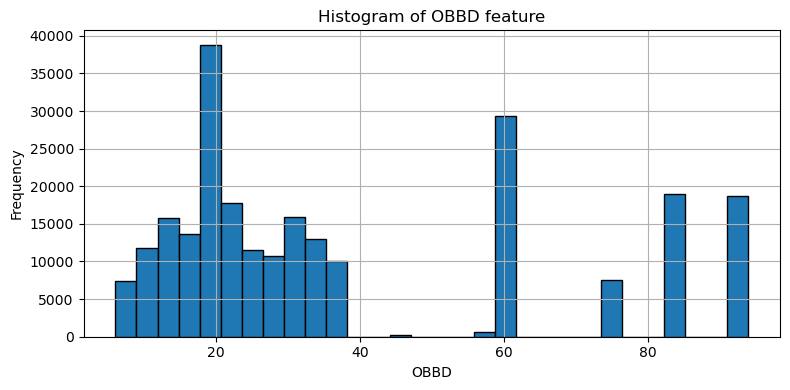

In [45]:
plot_single_histogram(encoded_df, 'OBBD')

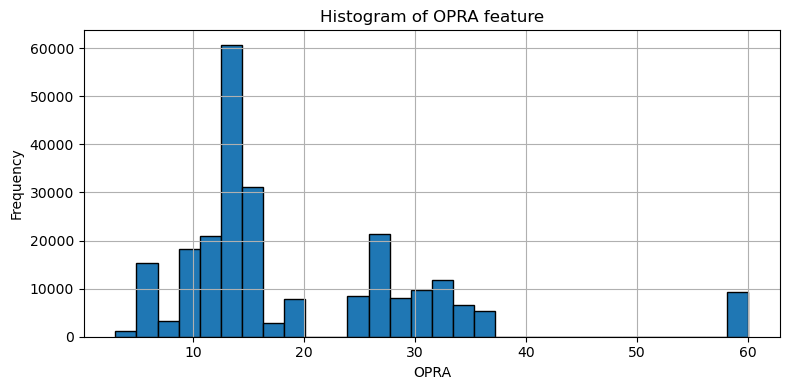

In [46]:
plot_single_histogram(encoded_df, 'OPRA')

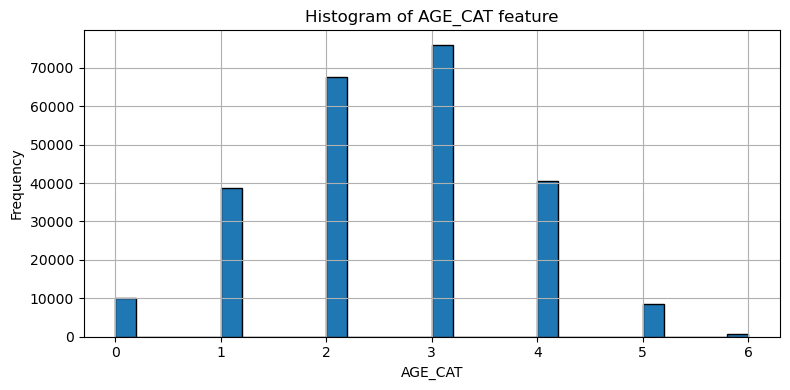

In [47]:
plot_single_histogram(encoded_df, 'AGE_CAT')

##### ii. Correlation Heatmaps

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df, features=None, threshold=None, top_n=None, least_n=False):

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        print("No numeric columns found to compute correlation heatmap.")
        return

    if features:
        selected_cols = [col for col in features if col in numeric_cols]
    elif top_n is not None:
        corr_with_first = df[numeric_cols].corr().abs().iloc[:, 0].sort_values(ascending=least_n)
        selected_cols = corr_with_first.index[1:top_n+1].tolist()
        selected_cols.insert(0, corr_with_first.index[0])  # keep reference/target column
    else:
        selected_cols = numeric_cols

    corr_matrix = df[selected_cols].corr()

    if threshold is not None:
        corr_matrix = corr_matrix.loc[(corr_matrix.abs() > threshold).any(axis=1),
                                      (corr_matrix.abs() > threshold).any(axis=0)]

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title("Correlation Heatmap of Selected Features")
    plt.tight_layout()
    plt.show()


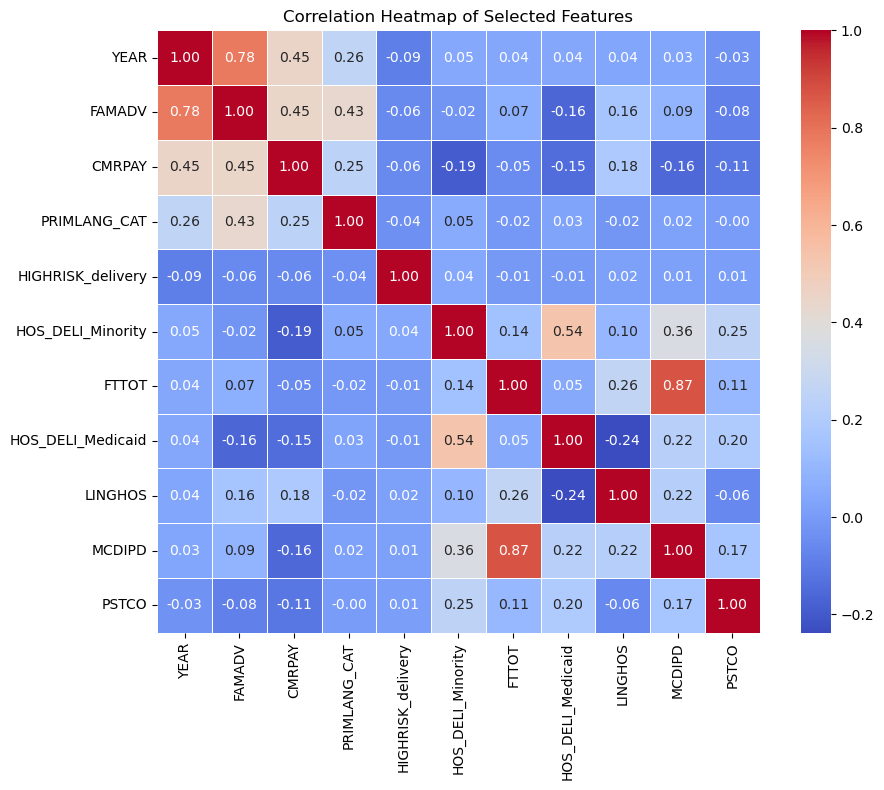

In [49]:
plot_correlation_heatmap(encoded_df, top_n=10, threshold = 0.5) # Top 10 Correlated Features


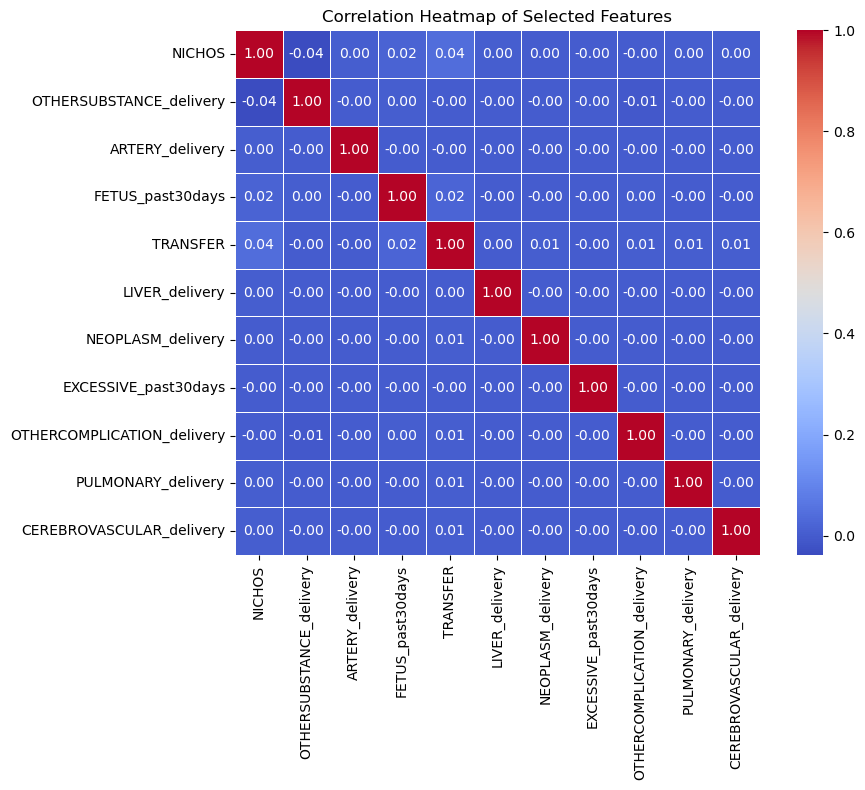

In [50]:
plot_correlation_heatmap(encoded_df, top_n=10, least_n=True) # Least 10 Correlated Features

##### iii.Boxplot

In [51]:
# Function for a paricular column BOXPLOT
def plot_single_boxplot(df, column):

    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} feature")
    plt.xlabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


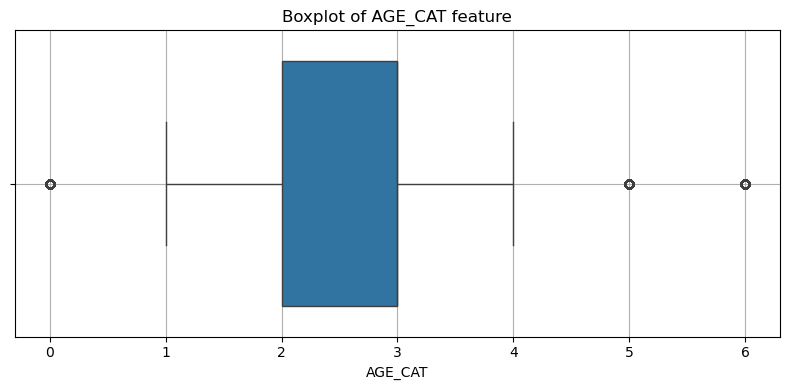

In [52]:
plot_single_boxplot(encoded_df, 'AGE_CAT')

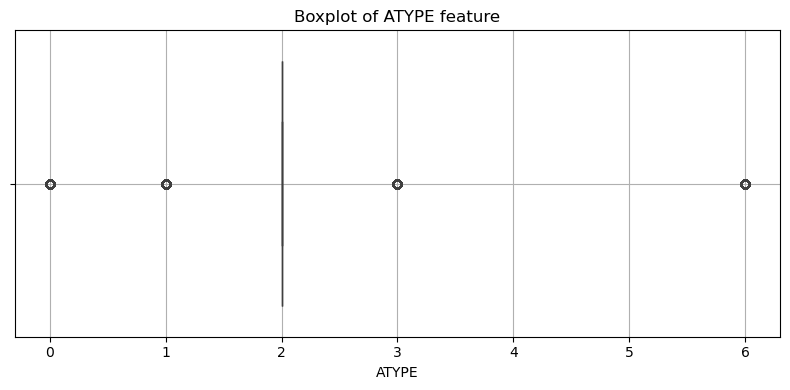

In [53]:
plot_single_boxplot(encoded_df, 'ATYPE')

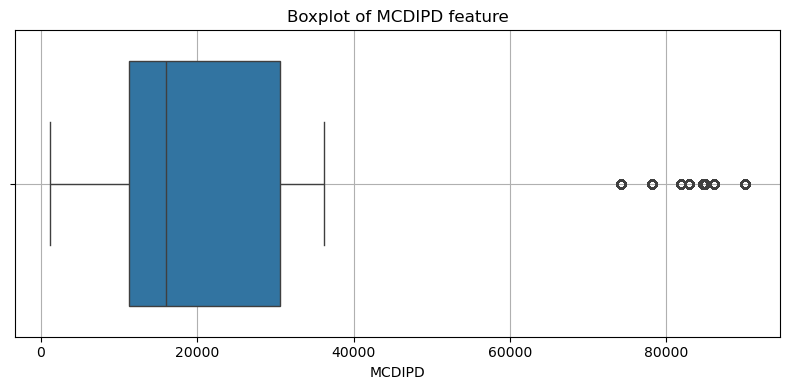

In [54]:
plot_single_boxplot(encoded_df, 'MCDIPD')

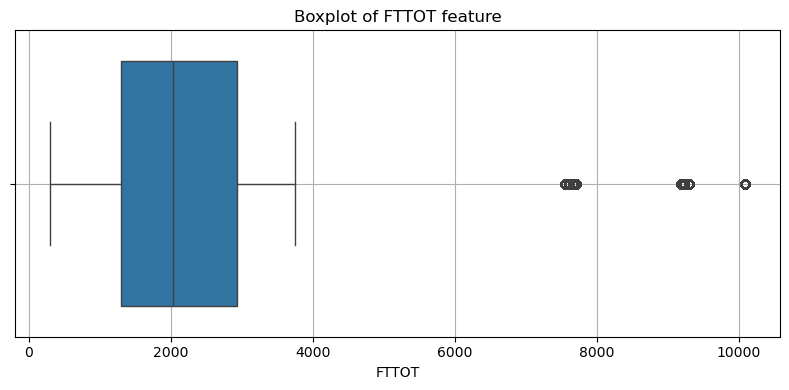

In [55]:
plot_single_boxplot(encoded_df, 'FTTOT')

##### iv.Scatterplot

In [56]:
# Function of Scatterplot for Particular column correlation with Target/other column

def plot_single_scatterplot(df, x_col, y_col):

    if x_col not in df.columns or y_col not in df.columns:
        print(f"One or both columns '{x_col}', '{y_col}' not found in DataFrame.")
        return

    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[x_col], y=df[y_col])
    plt.title(f"Scatter Plot: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


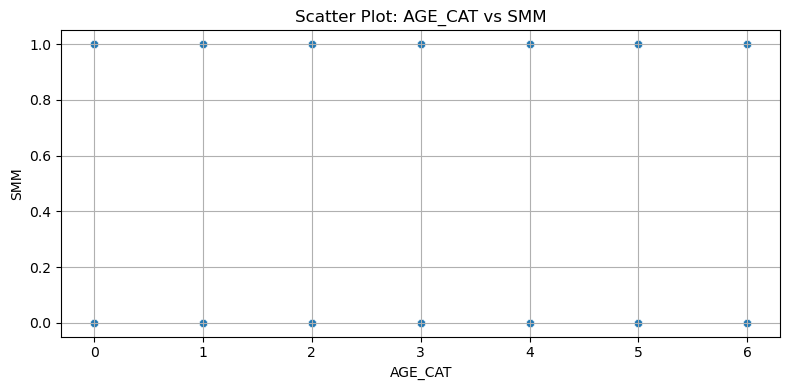

In [57]:
plot_single_scatterplot(encoded_df, 'AGE_CAT', 'SMM')

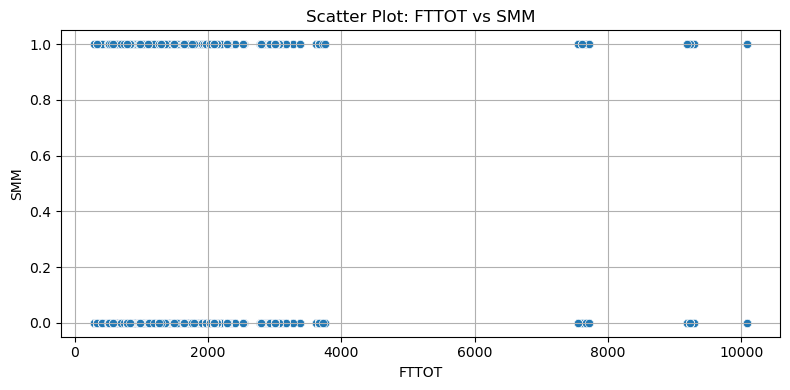

In [58]:
plot_single_scatterplot(encoded_df, 'FTTOT', 'SMM')

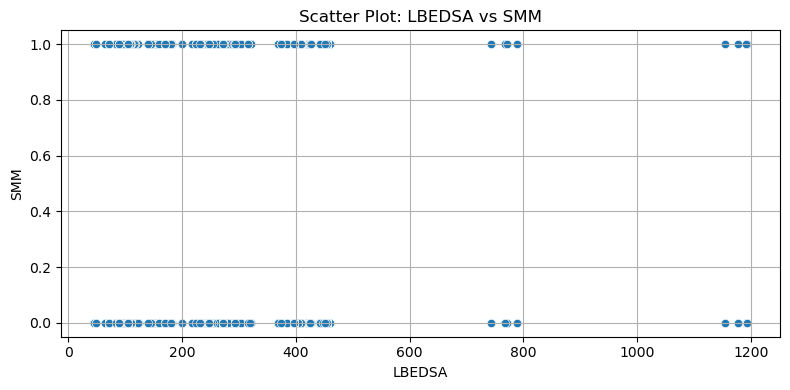

In [59]:
plot_single_scatterplot(encoded_df, 'LBEDSA', 'SMM')

In [60]:
encoded_df.shape

(242143, 76)

## **Part 2:** Health Data Analysis using Machine Learning

#### 4.Use machine learning to make predictions based on the dataset

Prepare the data:
* Divide dataset into training and testing data (80% training and 20 %testing).
* Utilize a data loader (e.g., PyTorch DataLoader) for efficient data
management.
* Perform feature selection or dimensionality reduction (e.g., PCA,
SelectKBest) to improve model performance.
* Implement data augmentation techniques for imbalanced
datasets

#with oversampling and selected features

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler

def prepare_data(df, target_column='SMM', test_size=0.2, k_best=75, apply_pca=False, random_state=42):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Remove constant features before split
    X = X.loc[:, X.nunique() > 1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Apply Random Oversampling
    oversampler = RandomOverSampler(sampling_strategy=0.666, random_state=42)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Feature Selection or PCA
    if apply_pca:
        pca = PCA(n_components=k_best)
        X_train_scaled = pca.fit_transform(X_train_scaled)
        X_test_scaled = pca.transform(X_test_scaled)
    else:
        selector = SelectKBest(score_func=f_classif, k=k_best)
        X_train_scaled = selector.fit_transform(X_train_scaled, y_train)
        X_test_scaled = selector.transform(X_test_scaled)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [62]:
X_train, X_test, y_train, y_test = prepare_data(encoded_df, target_column='SMM', test_size=0.2, k_best=30, apply_pca=False, random_state=42)

/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [63]:
print(y_test.value_counts(normalize = True))

SMM
0    0.992153
1    0.007847
Name: proportion, dtype: float64


In [64]:
print(y_train.value_counts(normalize = True))

SMM
0    0.600241
1    0.399759
Name: proportion, dtype: float64


In [65]:
print(y_test.value_counts())  # shows how many in each class


SMM
0    48049
1      380
Name: count, dtype: int64


In [66]:
print(y_train.value_counts())  # shows how many in each class


SMM
0    192220
1    128018
Name: count, dtype: int64


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to train model
def train_model(X_train, y_train, model, param_grid, cv=5):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_train_pred = grid.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_acc:.4f}")
    return grid.best_estimator_


In [68]:
def evaluate_model(model, X_test, y_test, model_name=None):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\nEvaluation Report{f' - {model_name}' if model_name else ''}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix{f' - {model_name}' if model_name else ''}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name or "Model"} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

    return {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'ROC-AUC': roc_auc
    }

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve  # Import necessary metrics



models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10]},
    "Random Forest": { 'n_estimators': [50, 100],  'max_depth': [3, 5, 10], 'min_samples_split': [5, 10], 'class_weight': ['balanced'] }
}

/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.6878

Evaluation Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     48049
           1       0.03      0.40      0.05       380

    accuracy                           0.88     48429
   macro avg       0.51      0.64      0.49     48429
weighted avg       0.99      0.88      0.93     48429



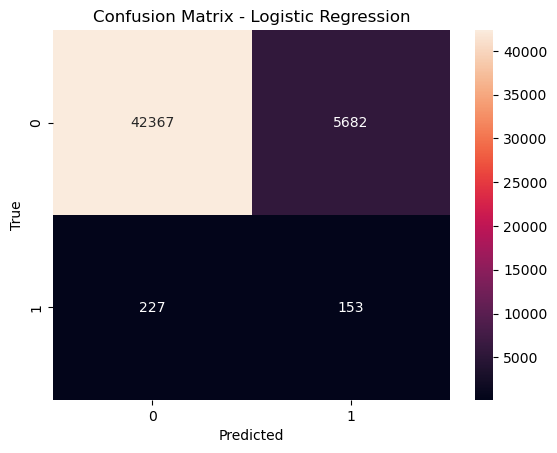

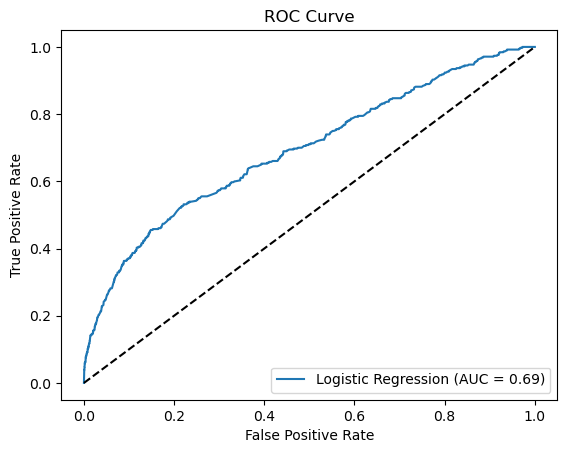

In [70]:
# 1. Prepare data
X_train, X_test, y_train, y_test = prepare_data(encoded_df, target_column='SMM', test_size=0.2, k_best=20, apply_pca=False, random_state=42
)

# 2. Train model with GridSearchCV
best_model = train_model(X_train, y_train, model=models['Logistic Regression'], param_grid=param_grids['Logistic Regression'])

# 3. Evaluate on test set
metrics = evaluate_model(best_model, X_test, y_test, model_name='Logistic Regression')


/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.7321

Evaluation Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     48049
           1       0.02      0.44      0.03       380

    accuracy                           0.80     48429
   macro avg       0.51      0.62      0.46     48429
weighted avg       0.99      0.80      0.88     48429



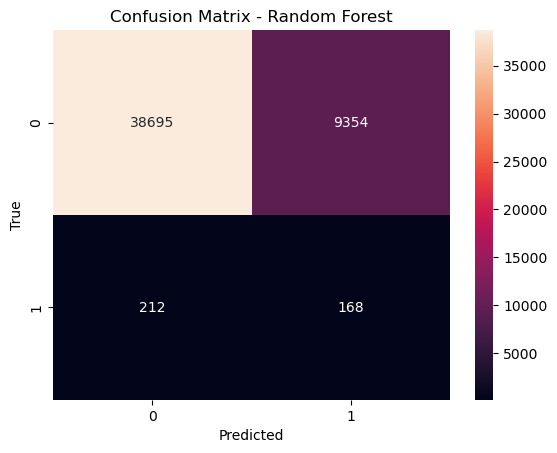

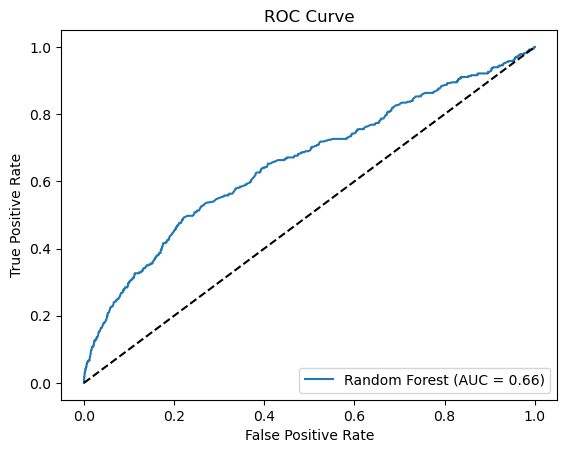

In [71]:
# 1. Prepare data
X_train, X_test, y_train, y_test = prepare_data(encoded_df, target_column='SMM', test_size=0.2, k_best=20, apply_pca=False, random_state= 42)

# 2. Train model with GridSearchCV
best_model = train_model(X_train, y_train, model=models['Random Forest'], param_grid=param_grids['Random Forest'])

# 3. Evaluate on test set
metrics = evaluate_model(best_model, X_test, y_test, model_name='Random Forest')


#### 5.Compare different machine learning methods.

In [72]:
# For three independent runs to ensure reliability for different seeds
def run_three_independent_experiments(df, target_column, model, param_grid, prepare_data_fn, test_size=0.2, k_best=20, apply_pca=False):
    scores = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

    for run in range(3):
        print(f"\n--- Run {run+1}/3 ---")
        X_train, X_test, y_train, y_test = prepare_data_fn(
            df, target_column=target_column, test_size=test_size,
            k_best=k_best, apply_pca=apply_pca, random_state= 42 + run 
        )
        best_model = train_model(X_train, y_train, model, param_grid)
        metrics = evaluate_model(best_model, X_test, y_test, model_name=f"Run {run+1}")

        for key in scores:
            scores[key].append(metrics[key])

    print("\nAverage Performance Over 3 Independent Runs:")
    summary = {}
    for key in scores:
        mean = np.mean(scores[key])
        std = np.std(scores[key])
        print(f"{key}: {mean:.3f} ± {std:.3f}")
        summary[key] = f"{mean:.3f} ± {std:.3f}"

    return summary

def compare_models_over_3_runs(df, target_column, models_dict, param_grids, prepare_data_fn, test_size=0.2, k_best=20, apply_pca=False):
    all_results = []
    for name, model in models_dict.items():
        print(f"\n==== {name} ====")
        summary = run_three_independent_experiments(
            df, target_column, model, param_grids[name], prepare_data_fn,
            test_size=test_size, k_best=k_best, apply_pca=apply_pca
        )
        summary['Model'] = name
        all_results.append(summary)
    results_df = pd.DataFrame(all_results)
    print("\nComparison Table:")
    print(results_df.set_index("Model"))
    return results_df


==== Logistic Regression ====

--- Run 1/3 ---


/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.6878

Evaluation Report - Run 1:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     48049
           1       0.03      0.40      0.05       380

    accuracy                           0.88     48429
   macro avg       0.51      0.64      0.49     48429
weighted avg       0.99      0.88      0.93     48429



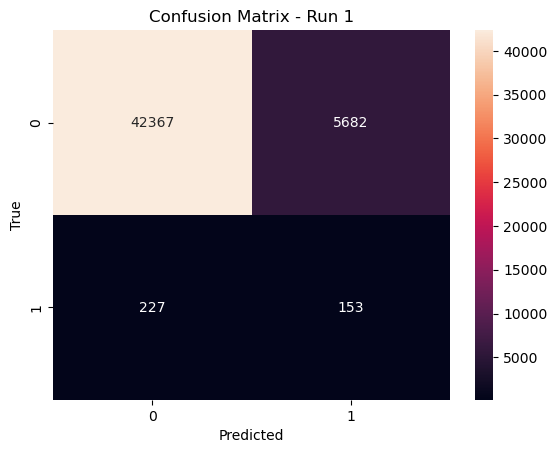

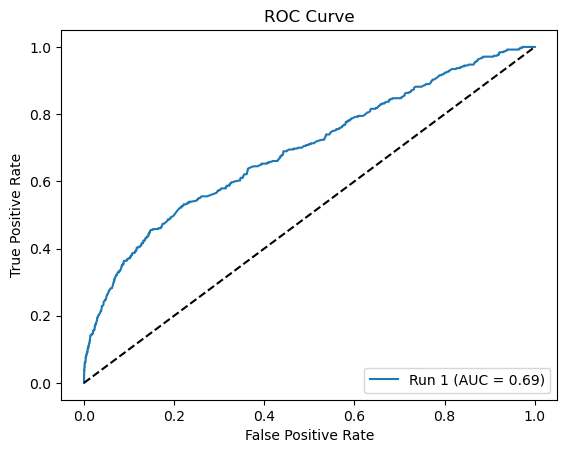


--- Run 2/3 ---
Training Accuracy: 0.6843

Evaluation Report - Run 2:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     48073
           1       0.02      0.41      0.04       356

    accuracy                           0.87     48429
   macro avg       0.51      0.64      0.49     48429
weighted avg       0.99      0.87      0.92     48429



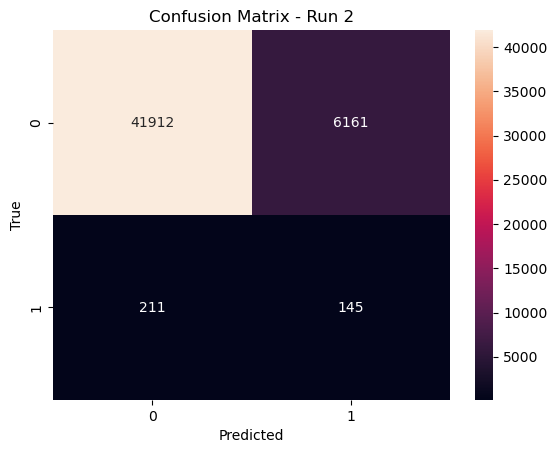

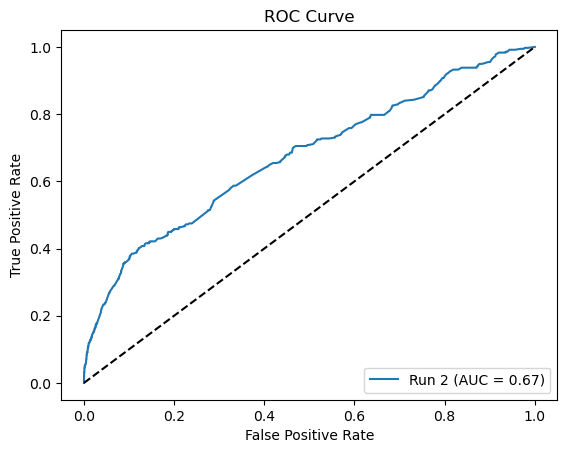


--- Run 3/3 ---
Training Accuracy: 0.6862

Evaluation Report - Run 3:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     48089
           1       0.02      0.43      0.05       340

    accuracy                           0.87     48429
   macro avg       0.51      0.65      0.49     48429
weighted avg       0.99      0.87      0.93     48429



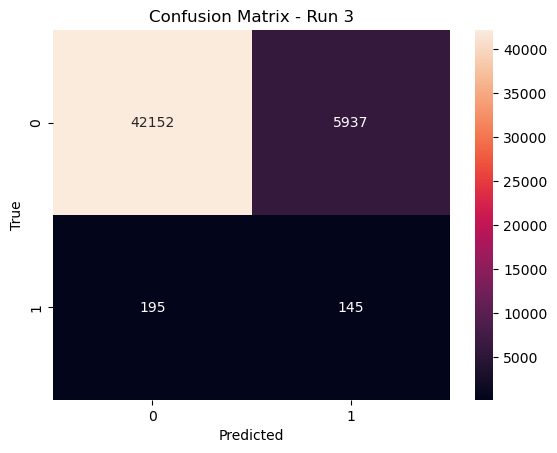

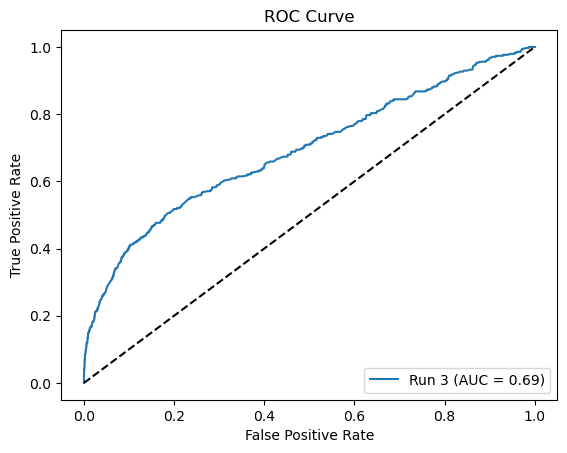


Average Performance Over 3 Independent Runs:
Accuracy: 0.873 ± 0.004
Precision: 0.988 ± 0.001
Recall: 0.873 ± 0.004
F1-Score: 0.926 ± 0.002
ROC-AUC: 0.686 ± 0.008

==== Random Forest ====

--- Run 1/3 ---


/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sahau24/csc790env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.7326

Evaluation Report - Run 1:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     48049
           1       0.02      0.46      0.03       380

    accuracy                           0.79     48429
   macro avg       0.51      0.63      0.46     48429
weighted avg       0.99      0.79      0.88     48429



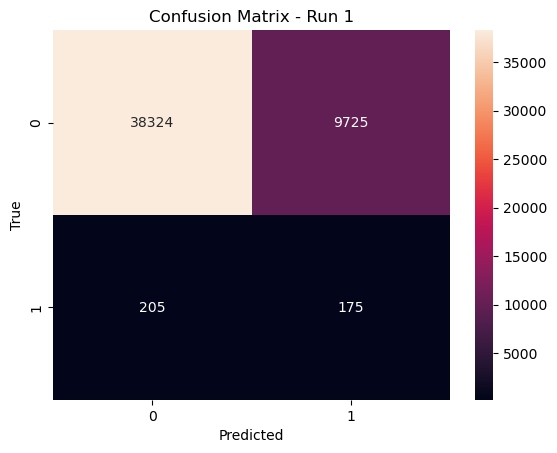

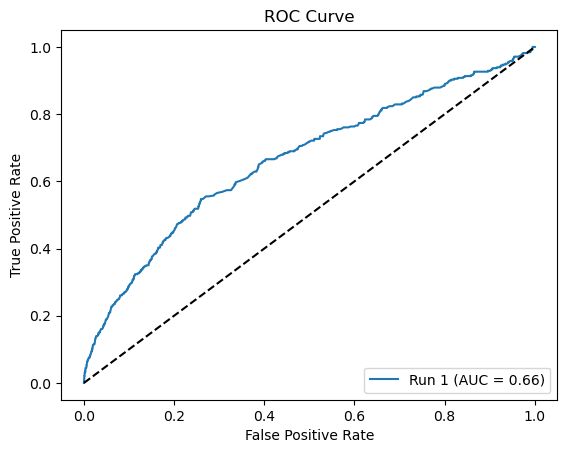


--- Run 2/3 ---
Training Accuracy: 0.7163

Evaluation Report - Run 2:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     48073
           1       0.02      0.48      0.03       356

    accuracy                           0.77     48429
   macro avg       0.51      0.63      0.45     48429
weighted avg       0.99      0.77      0.86     48429



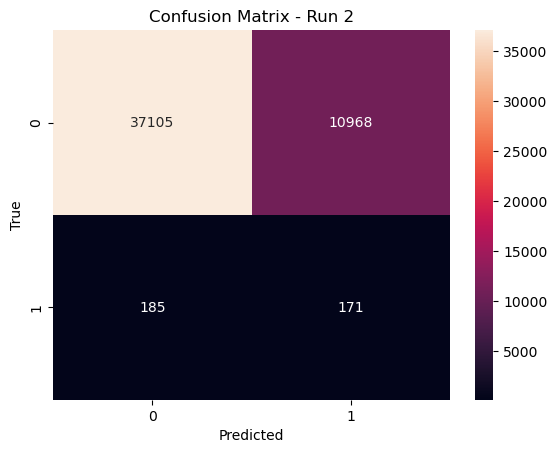

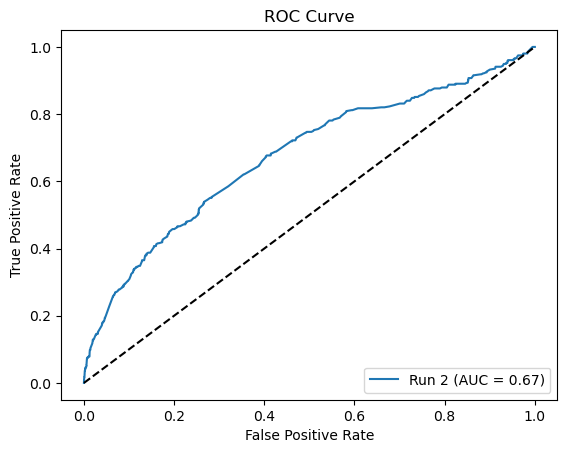


--- Run 3/3 ---
Training Accuracy: 0.7279

Evaluation Report - Run 3:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     48089
           1       0.02      0.49      0.03       340

    accuracy                           0.79     48429
   macro avg       0.51      0.64      0.46     48429
weighted avg       0.99      0.79      0.87     48429



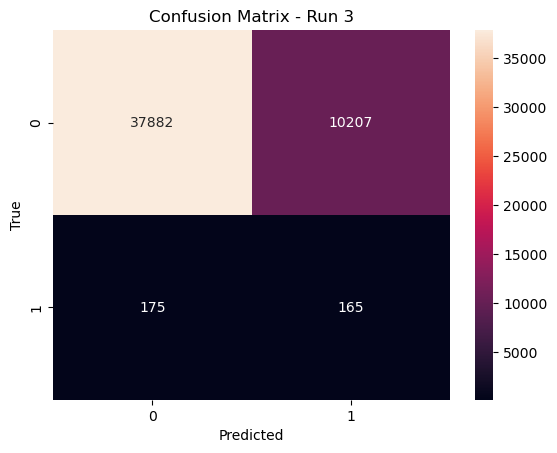

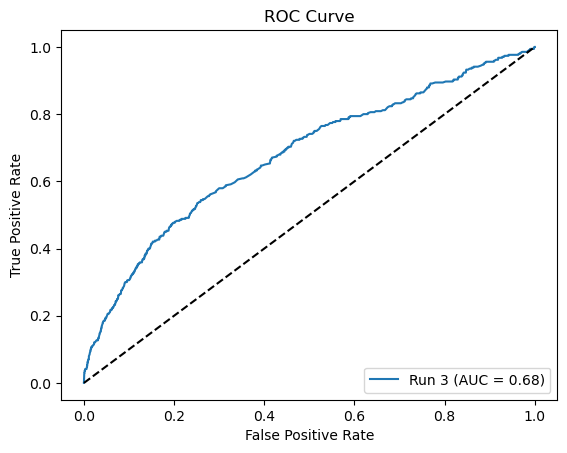


Average Performance Over 3 Independent Runs:
Accuracy: 0.783 ± 0.010
Precision: 0.988 ± 0.001
Recall: 0.783 ± 0.010
F1-Score: 0.872 ± 0.006
ROC-AUC: 0.672 ± 0.005

Comparison Table:
                          Accuracy      Precision         Recall  \
Model                                                              
Logistic Regression  0.873 ± 0.004  0.988 ± 0.001  0.873 ± 0.004   
Random Forest        0.783 ± 0.010  0.988 ± 0.001  0.783 ± 0.010   

                          F1-Score        ROC-AUC  
Model                                              
Logistic Regression  0.926 ± 0.002  0.686 ± 0.008  
Random Forest        0.872 ± 0.006  0.672 ± 0.005  


In [73]:


# Run comparison
results_df = compare_models_over_3_runs(
    df= encoded_df,                # your preprocessed dataframe
    target_column="SMM",               # or your actual target name
    models_dict=models,
    param_grids=param_grids,
    prepare_data_fn=prepare_data       # your defined preprocessing function
)


## **Part 3:** Health Data Analysis using Deep Learning (100 points)

#### 6.Use deep learning to make predictions based on the dataset

In [155]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch
import pandas as pd

# Prepare dataset
def prepare_ratio_split_dl(df, target_column='SMM', test_size=0.2, class_ratio=(0.6, 0.4), random_state=42, batch_size=64):

    # Separate by class
    df_0 = df[df[target_column] == 0]
    df_1 = df[df[target_column] == 1]

    # Total number of samples = limited by smaller class / desired ratio
    min_class_count = min(len(df_0) / class_ratio[0], len(df_1) / class_ratio[1])
    count_0 = int(min_class_count * class_ratio[0])
    count_1 = int(min_class_count * class_ratio[1])

    # Sample each class
    df_0_sampled = df_0.sample(n=count_0, random_state=random_state)
    df_1_sampled = df_1.sample(n=count_1, random_state=random_state)

    # Combine and shuffle
    df_balanced = pd.concat([df_0_sampled, df_1_sampled]).sample(frac=1, random_state=random_state)

    # Split
    X = df_balanced.drop(columns=[target_column])
    y = df_balanced[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # To tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

    # Loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Display final class proportions
    print("Class Distribution After 60:40 Split")
    print("Train:")
    print(y_train.value_counts(normalize=True).rename('Proportion'))
    print("Test:")
    print(y_test.value_counts(normalize=True).rename('Proportion'))

    return train_loader, test_loader, X_train_tensor.shape[1]


In [156]:
train_loader, test_loader, input_dim = prepare_ratio_split_dl(
    encoded_df, target_column='SMM', batch_size=128
)


Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64


###### a.BasicANN

In [157]:
class BasicANN(nn.Module):
    def __init__(self, input_dim, dropout=0.2):
        super(BasicANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)


In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def train_deep_model(train_loader, test_loader, input_dim, model_class, epochs=50, lr=0.0001, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model_class(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    counter = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                preds = torch.argmax(out, dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(yb.cpu().numpy())

        val_losses.append(val_loss / len(test_loader))
        epoch_acc = accuracy_score(all_labels, all_preds)
        epoch_precision = precision_score(all_labels, all_preds, zero_division=0)
        epoch_recall = recall_score(all_labels, all_preds, zero_division=0)
        epoch_f1 = f1_score(all_labels, all_preds, zero_division=0)
        print(f"Epoch {epoch+1:02d}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Acc: {epoch_acc:.4f} - Precision: {epoch_precision:.4f} - Recall: {epoch_recall:.4f}")


        # Early stopping
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            counter = 0
            best_model_state = model.state_dict()
        else:
            counter += 1
            if counter >= patience:
                print(f"\nEarly stopping at epoch {epoch+1}. Best Val Loss: {best_val_loss:.4f}")
                model.load_state_dict(best_model_state)
                break

    # Final evaluation
    final_preds, final_labels = [], []
    model.eval()
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            out = model(xb)
            preds = torch.argmax(out, dim=1).cpu().numpy()
            final_preds.extend(preds)
            final_labels.extend(yb.cpu().numpy())

    print("\nFinal Classification Report:")
    print(classification_report(final_labels, final_preds))

    cm = confusion_matrix(final_labels, final_preds)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Loss curves
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return model

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def train_deep_model(train_loader, test_loader, input_dim, model_class, epochs=50, lr=0.0001, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model_class(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    counter = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                preds = torch.argmax(out, dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(yb.cpu().numpy())

        val_losses.append(val_loss / len(test_loader))
        epoch_acc = accuracy_score(all_labels, all_preds)
        epoch_precision = precision_score(all_labels, all_preds, zero_division=0)
        epoch_recall = recall_score(all_labels, all_preds, zero_division=0)
        epoch_f1 = f1_score(all_labels, all_preds, zero_division=0)
        print(f"Epoch {epoch+1:02d}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} "
          f"- Val Acc: {epoch_acc:.4f} - Precision: {epoch_precision:.4f} - Recall: {epoch_recall:.4f} - F1: {epoch_f1:.4f}")



        # Early stopping
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            counter = 0
            best_model_state = model.state_dict()
        else:
            counter += 1
            if counter >= patience:
                print(f"\nEarly stopping at epoch {epoch+1}. Best Val Loss: {best_val_loss:.4f}")
                model.load_state_dict(best_model_state)
                break

    # Final evaluation
    final_preds, final_labels = [], []
    model.eval()
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            out = model(xb)
            preds = torch.argmax(out, dim=1).cpu().numpy()
            final_preds.extend(preds)
            final_labels.extend(yb.cpu().numpy())

    print("\nFinal Classification Report:")
    print(classification_report(final_labels, final_preds))

    cm = confusion_matrix(final_labels, final_preds)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Loss curves
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return model

###### Hyperparameter Tuning

Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7640 - Val Loss: 0.7319 - Val Acc: 0.4184 - Precision: 0.3990 - Recall: 0.8960


Epoch 02/30 - Train Loss: 0.7094 - Val Loss: 0.6789 - Val Acc: 0.5475 - Precision: 0.4600 - Recall: 0.7520
Epoch 03/30 - Train Loss: 0.6683 - Val Loss: 0.6479 - Val Acc: 0.6318 - Precision: 0.5344 - Recall: 0.6213
Epoch 04/30 - Train Loss: 0.6554 - Val Loss: 0.6294 - Val Acc: 0.6638 - Precision: 0.5811 - Recall: 0.5733
Epoch 05/30 - Train Loss: 0.6445 - Val Loss: 0.6171 - Val Acc: 0.6884 - Precision: 0.6370 - Recall: 0.5147
Epoch 06/30 - Train Loss: 0.6288 - Val Loss: 0.6109 - Val Acc: 0.6990 - Precision: 0.6566 - Recall: 0.5200
Epoch 07/30 - Train Loss: 0.6293 - Val Loss: 0.6020 - Val Acc: 0.6990 - Precision: 0.6632 - Recall: 0.5040
Epoch 08/30 - Train Loss: 0.6234 - Val Loss: 0.5982 - Val Acc: 0.7044 - Precision: 0.6788 - Recall: 0.4960
Epoch 09/30 - Train Loss: 0.6175 - Val Loss: 0.5920 - Val Acc: 0.7022 - Precision: 0.6875 - Recall: 0.4693
Epoch 10/30 - Train Loss: 0.6119 - Val Loss: 0.5891 - Val Acc: 0.7033 - Precision: 0.6932 - Recall: 0.4640
Epoch 11/30 - Train Loss: 0.6098 - Va

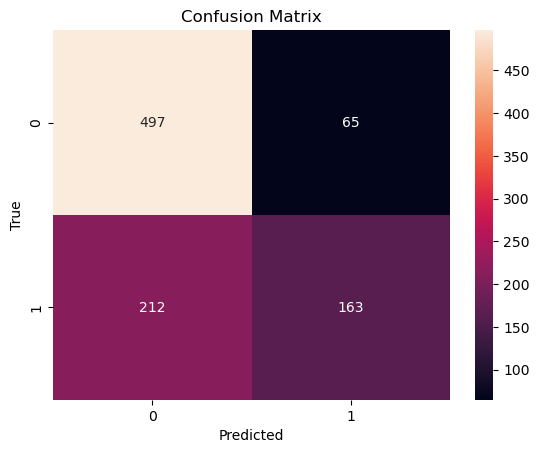

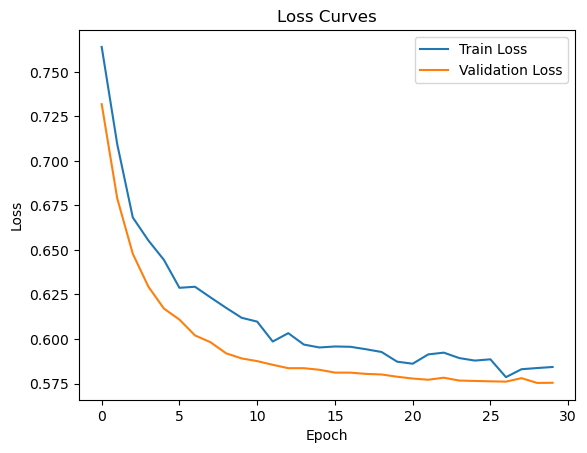

In [166]:
# Prepare data (with oversampling and scaling)
train_loader, test_loader, input_dim = prepare_ratio_split_dl(encoded_df, target_column='SMM', batch_size= 64)

# Train the model
model = train_deep_model(train_loader, test_loader, input_dim, model_class=BasicANN, epochs=30, lr=0.0001, patience=10)



Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7210 - Val Loss: 0.6958 - Val Acc: 0.5069 - Precision: 0.4155 - Recall: 0.5707 - F1: 0.4809
Epoch 02/30 - Train Loss: 0.6781 - Val Loss: 0.6552 - Val Acc: 0.6478 - Precision: 0.5818 - Recall: 0.4267 - F1: 0.4923
Epoch 03/30 - Train Loss: 0.6569 - Val Loss: 0.6377 - Val Acc: 0.6692 - Precision: 0.6199 - Recall: 0.4480 - F1: 0.5201
Epoch 04/30 - Train Loss: 0.6420 - Val Loss: 0.6206 - Val Acc: 0.6894 - Precision: 0.6842 - Recall: 0.4160 - F1: 0.5174
Epoch 05/30 - Train Loss: 0.6275 - Val Loss: 0.6103 - Val Acc: 0.6873 - Precision: 0.6864 - Recall: 0.4027 - F1: 0.5076
Epoch 06/30 - Train Loss: 0.6201 - Val Loss: 0.6031 - Val Acc: 0.6948 - Precision: 0.7014 - Recall: 0.4133 - F1: 0.5201
Epoch 07/30 - Train Loss: 0.6153 - Val Loss: 0.5994 - Val Acc: 0.6926 - Precision: 0.6986 - Recall: 

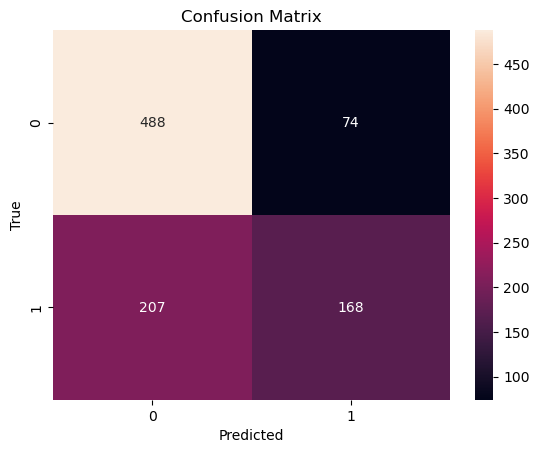

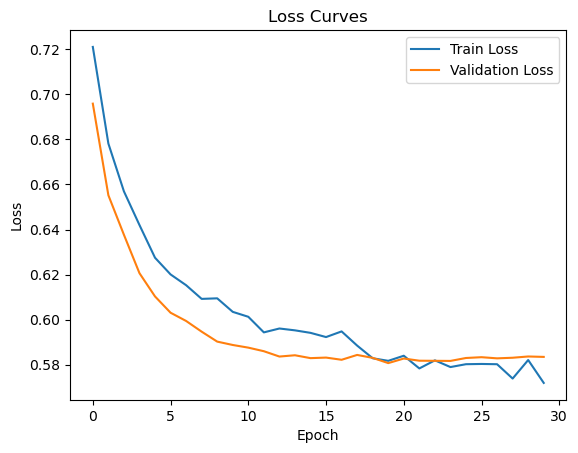

In [168]:
# Prepare data (with oversampling and scaling)
train_loader, test_loader, input_dim = prepare_ratio_split_dl(encoded_df, target_column='SMM', batch_size= 64)

# Train the model
model = train_deep_model(train_loader, test_loader, input_dim, model_class=BasicANN, epochs=30, lr=0.0001, patience=10)



To Ensure each reported result is based on at least three independent
experiments to ensure reliability.

In [178]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_multiple_runs(df, target_column='SMM', input_dim=None, model_class=None, epochs=30, lr=0.0001, patience=10, n_runs=3):
    metrics = {'Run': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

    for run in range(n_runs):
        print(f"\nRun {run+1}/{n_runs}")
        train_loader, test_loader, _ = prepare_ratio_split_dl(df, target_column=target_column)

        model = train_deep_model(
            train_loader=train_loader,
            test_loader=test_loader,
            input_dim=input_dim,
            model_class=model_class,
            epochs=epochs,
            lr=lr,
            patience=patience
        )

        all_preds, all_labels, all_probs = [], [], []
        model.eval()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(device)
                out = model(xb)
                probs = torch.softmax(out, dim=1)[:, 1].cpu().numpy()
                preds = torch.argmax(out, dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(yb.numpy())
                all_probs.extend(probs)

        metrics['Run'].append(run + 1)
        metrics['Accuracy'].append(accuracy_score(all_labels, all_preds))
        metrics['Precision'].append(precision_score(all_labels, all_preds, zero_division=0))
        metrics['Recall'].append(recall_score(all_labels, all_preds, zero_division=0))
        metrics['F1-Score'].append(f1_score(all_labels, all_preds, zero_division=0))
        metrics['ROC-AUC'].append(roc_auc_score(all_labels, all_probs))

    result_df = pd.DataFrame(metrics)

    print("Performance per Run:")
    print(result_df)

    print("Average Performance Over Runs:")
    print(result_df.drop(columns='Run').mean().round(3))

    return result_df



Run 1/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.6843 - Val Loss: 0.6483 - Val Acc: 0.6457 - Precision: 0.6667 - Recall: 0.2293 - F1: 0.3413
Epoch 02/30 - Train Loss: 0.6562 - Val Loss: 0.6309 - Val Acc: 0.6766 - Precision: 0.6837 - Recall: 0.3573 - F1: 0.4694
Epoch 03/30 - Train Loss: 0.6413 - Val Loss: 0.6178 - Val Acc: 0.6766 - Precision: 0.6978 - Recall: 0.3387 - F1: 0.4560
Epoch 04/30 - Train Loss: 0.6356 - Val Loss: 0.6099 - Val Acc: 0.6852 - Precision: 0.7020 - Recall: 0.3707 - F1: 0.4852
Epoch 05/30 - Train Loss: 0.6341 - Val Loss: 0.6016 - Val Acc: 0.6948 - Precision: 0.7070 - Recall: 0.4053 - F1: 0.5153
Epoch 06/30 - Train Loss: 0.6256 - Val Loss: 0.5987 - Val Acc: 0.6937 - Precision: 0.7075 - Recall: 0.4000 - F1: 0.5111
Epoch 07/30 - Train Loss: 0.6232 - Val Loss: 0.5925 - Val Acc: 0.7065 - Precision: 0.7404 -

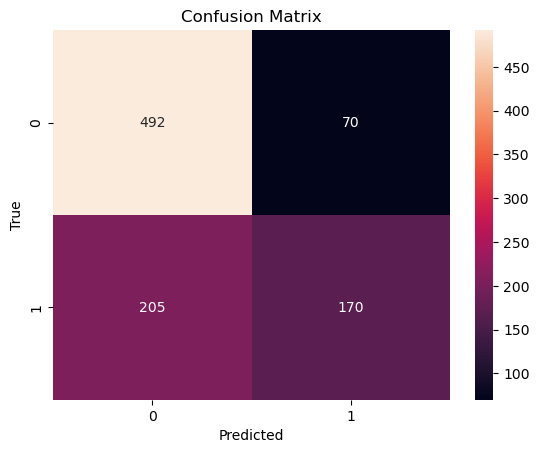

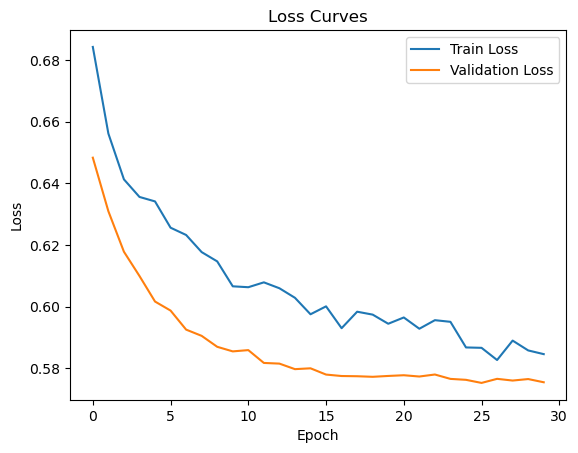


Run 2/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.6884 - Val Loss: 0.6446 - Val Acc: 0.6414 - Precision: 0.6931 - Recall: 0.1867 - F1: 0.2941
Epoch 02/30 - Train Loss: 0.6584 - Val Loss: 0.6287 - Val Acc: 0.6574 - Precision: 0.7143 - Recall: 0.2400 - F1: 0.3593
Epoch 03/30 - Train Loss: 0.6460 - Val Loss: 0.6167 - Val Acc: 0.6606 - Precision: 0.6993 - Recall: 0.2667 - F1: 0.3861
Epoch 04/30 - Train Loss: 0.6358 - Val Loss: 0.6102 - Val Acc: 0.6766 - Precision: 0.7278 - Recall: 0.3067 - F1: 0.4315
Epoch 05/30 - Train Loss: 0.6280 - Val Loss: 0.6004 - Val Acc: 0.6830 - Precision: 0.7294 - Recall: 0.3307 - F1: 0.4550
Epoch 06/30 - Train Loss: 0.6227 - Val Loss: 0.5950 - Val Acc: 0.7001 - Precision: 0.7500 - Recall: 0.3760 - F1: 0.5009
Epoch 07/30 - Train Loss: 0.6147 - Val Loss: 0.5953 - Val Acc: 0.7001 - Precision: 0.7500 -

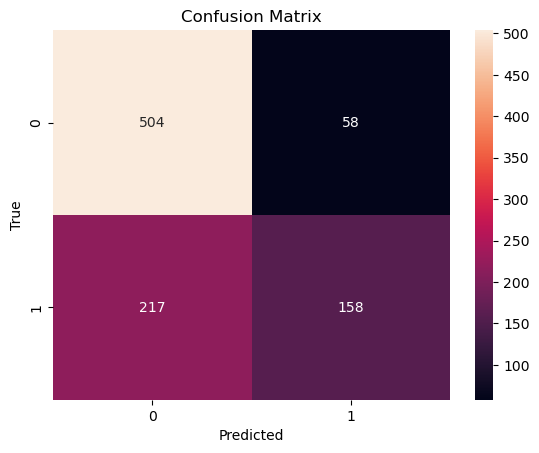

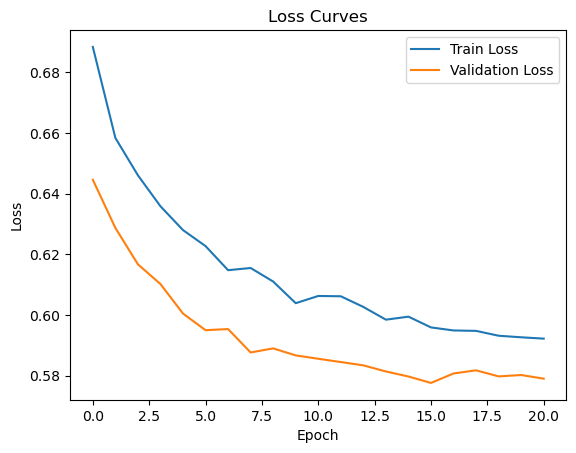


Run 3/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7113 - Val Loss: 0.6752 - Val Acc: 0.5326 - Precision: 0.4528 - Recall: 0.8053 - F1: 0.5797
Epoch 02/30 - Train Loss: 0.6818 - Val Loss: 0.6427 - Val Acc: 0.6531 - Precision: 0.5631 - Recall: 0.5947 - F1: 0.5785
Epoch 03/30 - Train Loss: 0.6572 - Val Loss: 0.6233 - Val Acc: 0.6948 - Precision: 0.6488 - Recall: 0.5173 - F1: 0.5757
Epoch 04/30 - Train Loss: 0.6392 - Val Loss: 0.6064 - Val Acc: 0.7076 - Precision: 0.6950 - Recall: 0.4800 - F1: 0.5678
Epoch 05/30 - Train Loss: 0.6281 - Val Loss: 0.5975 - Val Acc: 0.7108 - Precision: 0.7016 - Recall: 0.4827 - F1: 0.5719
Epoch 06/30 - Train Loss: 0.6246 - Val Loss: 0.5965 - Val Acc: 0.7076 - Precision: 0.7045 - Recall: 0.4640 - F1: 0.5595
Epoch 07/30 - Train Loss: 0.6173 - Val Loss: 0.5879 - Val Acc: 0.7108 - Precision: 0.7261 -

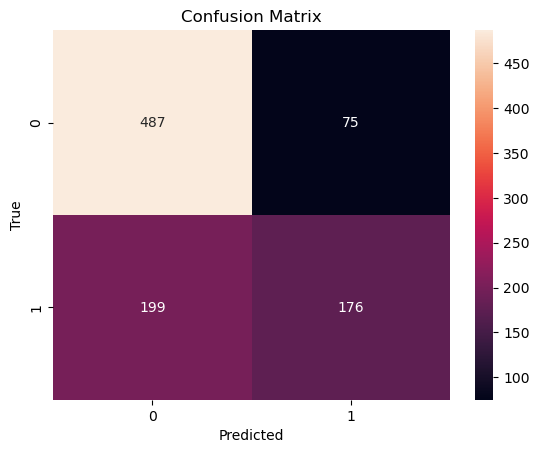

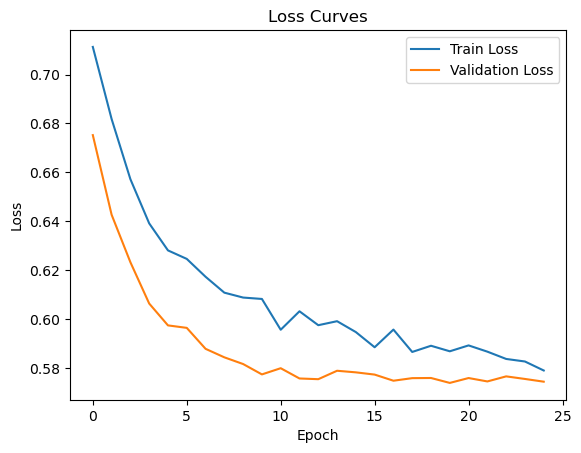

Performance per Run:
   Run  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    1  0.706510   0.708333  0.453333  0.552846  0.729917
1    2  0.706510   0.731481  0.421333  0.534687  0.728878
2    3  0.707577   0.701195  0.469333  0.562300  0.732522
Average Performance Over Runs:
Accuracy     0.707
Precision    0.714
Recall       0.448
F1-Score     0.550
ROC-AUC      0.730
dtype: float64


,Run,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,1,0.706510,0.708333,0.453333,0.552846,0.729917
1,2,0.706510,0.731481,0.421333,0.534687,0.728878
2,3,0.707577,0.701195,0.469333,0.562300,0.732522


In [ ]:
evaluate_multiple_runs(
    df=encoded_df,
    target_column='SMM',
    input_dim=input_dim,
    model_class=BasicANN,
    epochs=30,
    lr=0.0001,
    patience=5,
    n_runs=3
)



##### b. ResNet

In [181]:
import torch.nn as nn
import torch.nn.functional as F

class ResNetTabular(nn.Module):
    def __init__(self, input_dim, dropout=0.2):
        super(ResNetTabular, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.shortcut = nn.Identity()
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        residual = x
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = x + self.shortcut(residual) 
        x = self.dropout(x)
        return self.out(x)



###### Hyperparameter Tuning


Testing ResNetTabular with dropout=0.1, lr=0.0001
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.6853 - Val Loss: 0.6284 - Val Acc: 0.6745 - Precision: 0.6357 - Recall: 0.4373 - F1: 0.5182
Epoch 02/20 - Train Loss: 0.6259 - Val Loss: 0.6021 - Val Acc: 0.6958 - Precision: 0.7027 - Recall: 0.4160 - F1: 0.5226
Epoch 03/20 - Train Loss: 0.6218 - Val Loss: 0.5902 - Val Acc: 0.6990 - Precision: 0.7013 - Recall: 0.4320 - F1: 0.5347
Epoch 04/20 - Train Loss: 0.6026 - Val Loss: 0.5891 - Val Acc: 0.7022 - Precision: 0.7143 - Recall: 0.4267 - F1: 0.5342
Epoch 05/20 - Train Loss: 0.6021 - Val Loss: 0.5852 - Val Acc: 0.7033 - Precision: 0.7156 - Recall: 0.4293 - F1: 0.5367
Epoch 06/20 - Train Loss: 0.5969 - Val Loss: 0.5834 - Val Acc: 0.7022 - Precision: 0.7017 - Recall: 0.4453 - F1: 0.5449
Epoch 07/20 - Train Loss: 0.5936 - Val Loss: 0.58

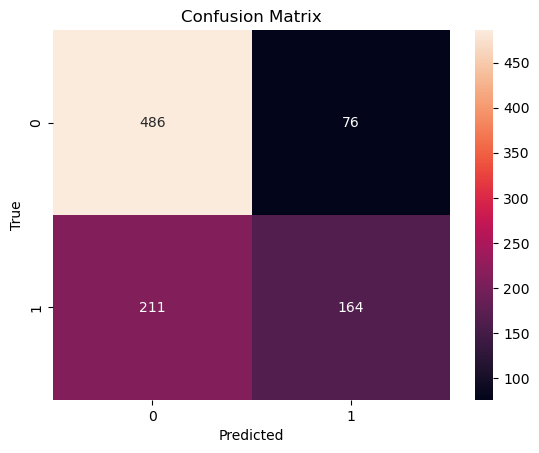

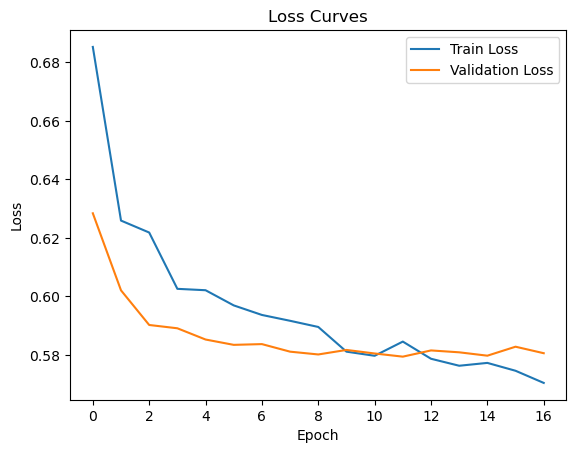


Testing ResNetTabular with dropout=0.1, lr=5e-05
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.6981 - Val Loss: 0.6448 - Val Acc: 0.6158 - Precision: 0.5176 - Recall: 0.5893 - F1: 0.5511
Epoch 02/20 - Train Loss: 0.6598 - Val Loss: 0.6178 - Val Acc: 0.6734 - Precision: 0.6109 - Recall: 0.5067 - F1: 0.5539
Epoch 03/20 - Train Loss: 0.6350 - Val Loss: 0.6044 - Val Acc: 0.6926 - Precision: 0.6900 - Recall: 0.4213 - F1: 0.5232
Epoch 04/20 - Train Loss: 0.6206 - Val Loss: 0.5963 - Val Acc: 0.7033 - Precision: 0.7366 - Recall: 0.4027 - F1: 0.5207
Epoch 05/20 - Train Loss: 0.6121 - Val Loss: 0.5919 - Val Acc: 0.6980 - Precision: 0.6983 - Recall: 0.4320 - F1: 0.5338
Epoch 06/20 - Train Loss: 0.6155 - Val Loss: 0.5879 - Val Acc: 0.7044 - Precision: 0.7227 - Recall: 0.4240 - F1: 0.5345
Epoch 07/20 - Train Loss: 0.6075 - Val Loss: 0.587

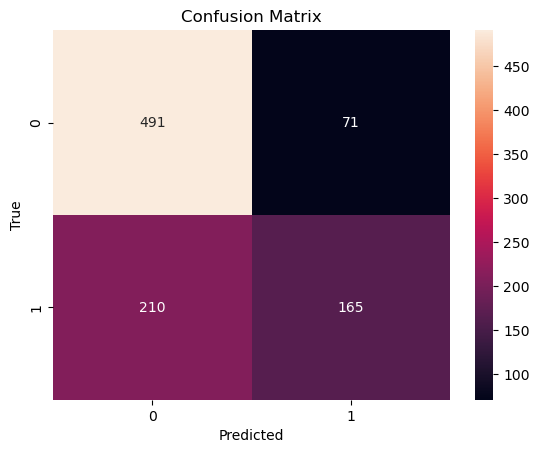

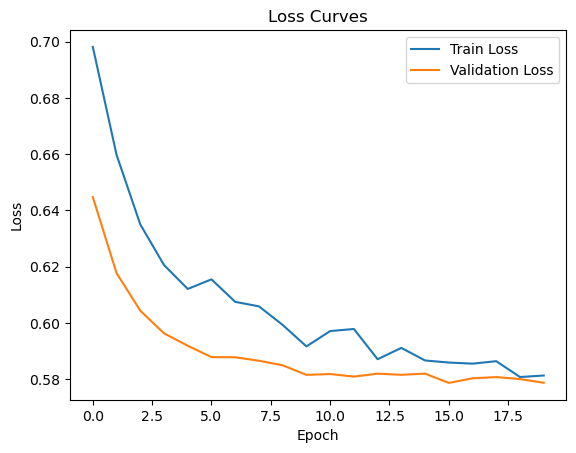


Testing ResNetTabular with dropout=0.1, lr=1e-05
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.7475 - Val Loss: 0.7307 - Val Acc: 0.5304 - Precision: 0.4047 - Recall: 0.3680 - F1: 0.3855
Epoch 02/20 - Train Loss: 0.7320 - Val Loss: 0.7165 - Val Acc: 0.5603 - Precision: 0.4427 - Recall: 0.3813 - F1: 0.4097
Epoch 03/20 - Train Loss: 0.7174 - Val Loss: 0.6968 - Val Acc: 0.6019 - Precision: 0.5038 - Recall: 0.3573 - F1: 0.4181
Epoch 04/20 - Train Loss: 0.6970 - Val Loss: 0.6822 - Val Acc: 0.6126 - Precision: 0.5214 - Recall: 0.3893 - F1: 0.4458
Epoch 05/20 - Train Loss: 0.6903 - Val Loss: 0.6691 - Val Acc: 0.6307 - Precision: 0.5560 - Recall: 0.3840 - F1: 0.4543
Epoch 06/20 - Train Loss: 0.6767 - Val Loss: 0.6589 - Val Acc: 0.6425 - Precision: 0.5926 - Recall: 0.3413 - F1: 0.4332
Epoch 07/20 - Train Loss: 0.6687 - Val Loss: 0.651

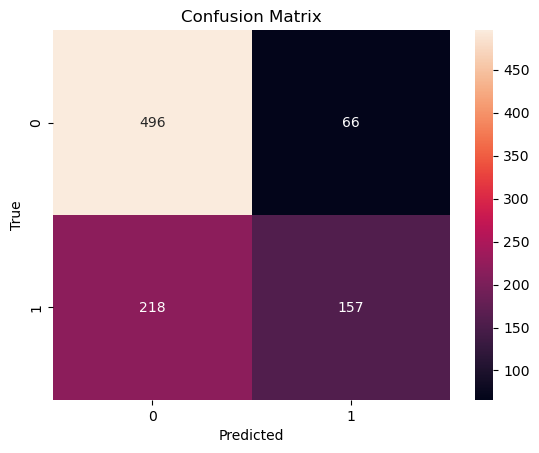

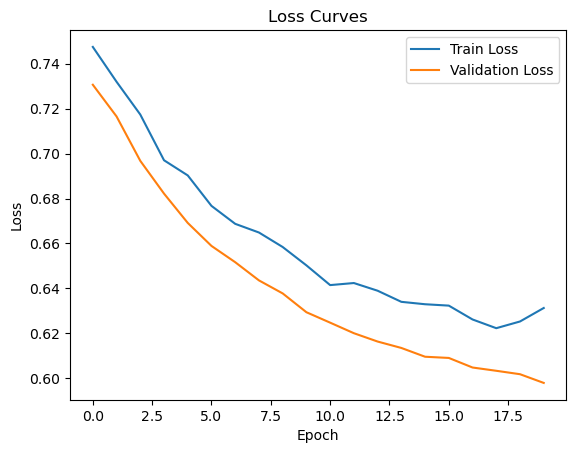


Testing ResNetTabular with dropout=0.2, lr=0.0001
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.6866 - Val Loss: 0.6257 - Val Acc: 0.6734 - Precision: 0.6375 - Recall: 0.4267 - F1: 0.5112
Epoch 02/20 - Train Loss: 0.6511 - Val Loss: 0.6004 - Val Acc: 0.6873 - Precision: 0.6847 - Recall: 0.4053 - F1: 0.5092
Epoch 03/20 - Train Loss: 0.6360 - Val Loss: 0.5915 - Val Acc: 0.7022 - Precision: 0.7400 - Recall: 0.3947 - F1: 0.5148
Epoch 04/20 - Train Loss: 0.6184 - Val Loss: 0.5870 - Val Acc: 0.7001 - Precision: 0.7374 - Recall: 0.3893 - F1: 0.5096
Epoch 05/20 - Train Loss: 0.6224 - Val Loss: 0.5842 - Val Acc: 0.6980 - Precision: 0.7347 - Recall: 0.3840 - F1: 0.5044
Epoch 06/20 - Train Loss: 0.6113 - Val Loss: 0.5802 - Val Acc: 0.7012 - Precision: 0.7340 - Recall: 0.3973 - F1: 0.5156
Epoch 07/20 - Train Loss: 0.6117 - Val Loss: 0.58

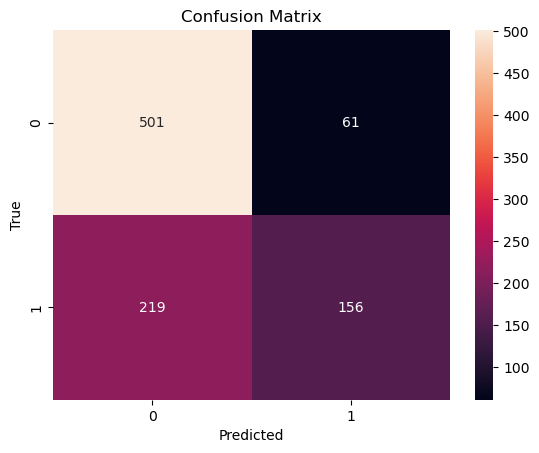

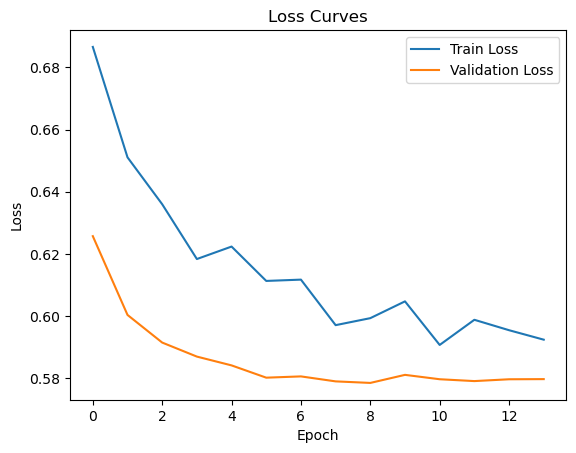


Testing ResNetTabular with dropout=0.2, lr=5e-05
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.7663 - Val Loss: 0.7053 - Val Acc: 0.5528 - Precision: 0.4507 - Recall: 0.5360 - F1: 0.4896
Epoch 02/20 - Train Loss: 0.7036 - Val Loss: 0.6601 - Val Acc: 0.6201 - Precision: 0.5268 - Recall: 0.4987 - F1: 0.5123
Epoch 03/20 - Train Loss: 0.6776 - Val Loss: 0.6347 - Val Acc: 0.6574 - Precision: 0.5849 - Recall: 0.4960 - F1: 0.5368
Epoch 04/20 - Train Loss: 0.6599 - Val Loss: 0.6168 - Val Acc: 0.6638 - Precision: 0.6111 - Recall: 0.4400 - F1: 0.5116
Epoch 05/20 - Train Loss: 0.6421 - Val Loss: 0.6083 - Val Acc: 0.6702 - Precision: 0.6187 - Recall: 0.4587 - F1: 0.5268
Epoch 06/20 - Train Loss: 0.6400 - Val Loss: 0.6014 - Val Acc: 0.6852 - Precision: 0.6695 - Recall: 0.4213 - F1: 0.5172
Epoch 07/20 - Train Loss: 0.6293 - Val Loss: 0.596

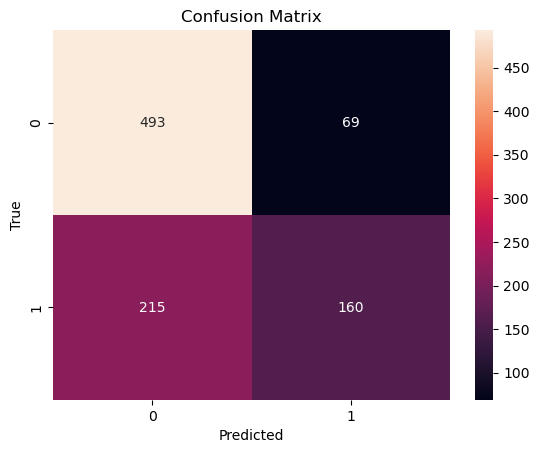

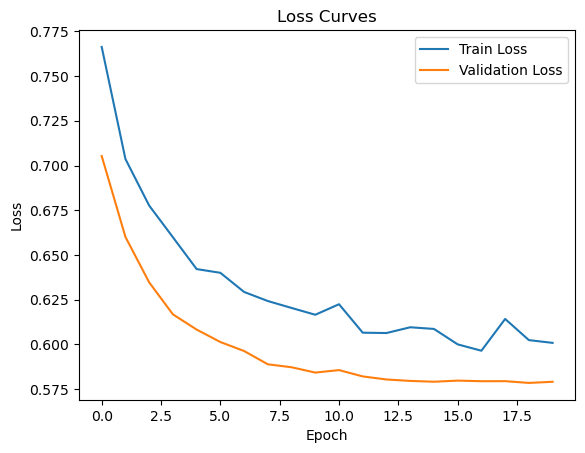


Testing ResNetTabular with dropout=0.2, lr=1e-05
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.8766 - Val Loss: 0.8302 - Val Acc: 0.4013 - Precision: 0.3903 - Recall: 0.8827 - F1: 0.5413
Epoch 02/20 - Train Loss: 0.8441 - Val Loss: 0.7889 - Val Acc: 0.4109 - Precision: 0.3914 - Recall: 0.8507 - F1: 0.5361
Epoch 03/20 - Train Loss: 0.8160 - Val Loss: 0.7652 - Val Acc: 0.4301 - Precision: 0.3979 - Recall: 0.8267 - F1: 0.5373
Epoch 04/20 - Train Loss: 0.7949 - Val Loss: 0.7406 - Val Acc: 0.4557 - Precision: 0.4048 - Recall: 0.7653 - F1: 0.5295
Epoch 05/20 - Train Loss: 0.7682 - Val Loss: 0.7209 - Val Acc: 0.4760 - Precision: 0.4132 - Recall: 0.7360 - F1: 0.5292
Epoch 06/20 - Train Loss: 0.7518 - Val Loss: 0.7073 - Val Acc: 0.4963 - Precision: 0.4222 - Recall: 0.7013 - F1: 0.5271
Epoch 07/20 - Train Loss: 0.7246 - Val Loss: 0.688

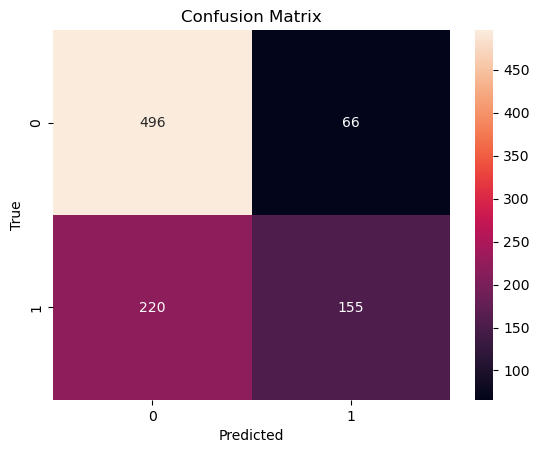

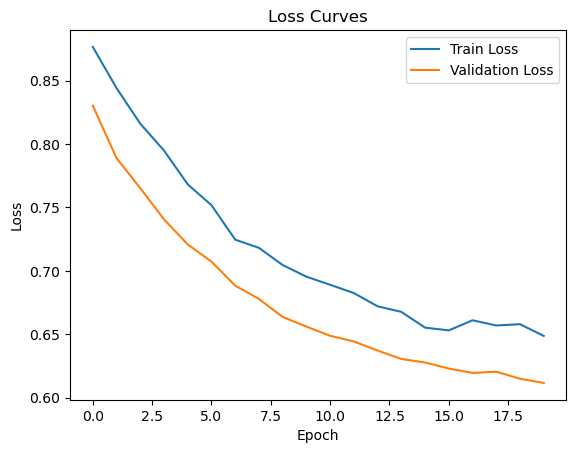

In [185]:
dropouts = [0.1, 0.2]
lrs = [0.0001, 0.00005, 0.00001]

for d in dropouts:
    for lr in lrs:
        print(f"\nTesting ResNetTabular with dropout={d}, lr={lr}")
        train_loader, test_loader, input_dim = prepare_ratio_split_dl(encoded_df, target_column='SMM')
        model = train_deep_model(
            train_loader=train_loader,
            test_loader=test_loader,
            input_dim=input_dim,
            model_class=lambda dim: ResNetTabular(dim, dropout=d),
            epochs=20,
            lr=lr,
            patience=5
        )



Run 1/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7022 - Val Loss: 0.6160 - Val Acc: 0.6766 - Precision: 0.6513 - Recall: 0.4133 - F1: 0.5057
Epoch 02/30 - Train Loss: 0.6521 - Val Loss: 0.5870 - Val Acc: 0.6990 - Precision: 0.7460 - Recall: 0.3760 - F1: 0.5000
Epoch 03/30 - Train Loss: 0.6274 - Val Loss: 0.5761 - Val Acc: 0.7108 - Precision: 0.7407 - Recall: 0.4267 - F1: 0.5415
Epoch 04/30 - Train Loss: 0.6234 - Val Loss: 0.5709 - Val Acc: 0.7172 - Precision: 0.7500 - Recall: 0.4400 - F1: 0.5546
Epoch 05/30 - Train Loss: 0.6135 - Val Loss: 0.5716 - Val Acc: 0.7140 - Precision: 0.7421 - Recall: 0.4373 - F1: 0.5503
Epoch 06/30 - Train Loss: 0.6115 - Val Loss: 0.5700 - Val Acc: 0.7161 - Precision: 0.7466 - Recall: 0.4400 - F1: 0.5537
Epoch 07/30 - Train Loss: 0.6073 - Val Loss: 0.5694 - Val Acc: 0.7140 - Precision: 0.7560 -

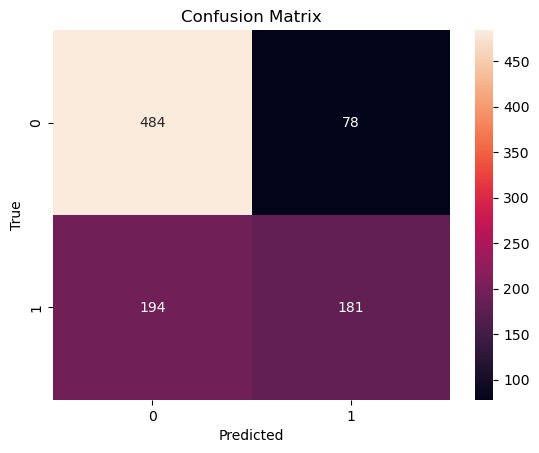

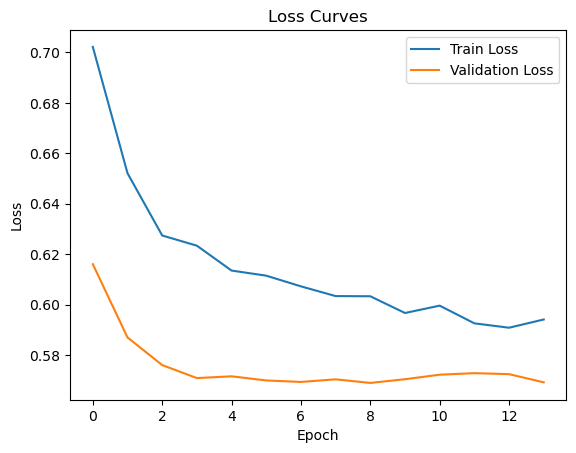


Run 2/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7515 - Val Loss: 0.6656 - Val Acc: 0.5880 - Precision: 0.4835 - Recall: 0.4293 - F1: 0.4548
Epoch 02/30 - Train Loss: 0.6671 - Val Loss: 0.6166 - Val Acc: 0.6926 - Precision: 0.7081 - Recall: 0.3947 - F1: 0.5068
Epoch 03/30 - Train Loss: 0.6462 - Val Loss: 0.5966 - Val Acc: 0.6948 - Precision: 0.7259 - Recall: 0.3813 - F1: 0.5000
Epoch 04/30 - Train Loss: 0.6236 - Val Loss: 0.5899 - Val Acc: 0.7033 - Precision: 0.7487 - Recall: 0.3893 - F1: 0.5123
Epoch 05/30 - Train Loss: 0.6086 - Val Loss: 0.5885 - Val Acc: 0.6990 - Precision: 0.7360 - Recall: 0.3867 - F1: 0.5070
Epoch 06/30 - Train Loss: 0.6055 - Val Loss: 0.5843 - Val Acc: 0.7033 - Precision: 0.7487 - Recall: 0.3893 - F1: 0.5123
Epoch 07/30 - Train Loss: 0.6071 - Val Loss: 0.5811 - Val Acc: 0.7033 - Precision: 0.7235 -

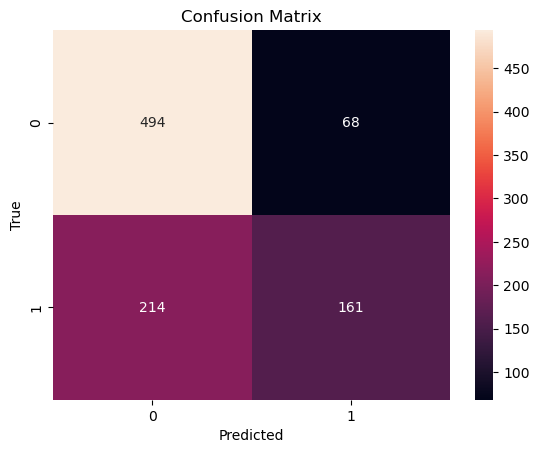

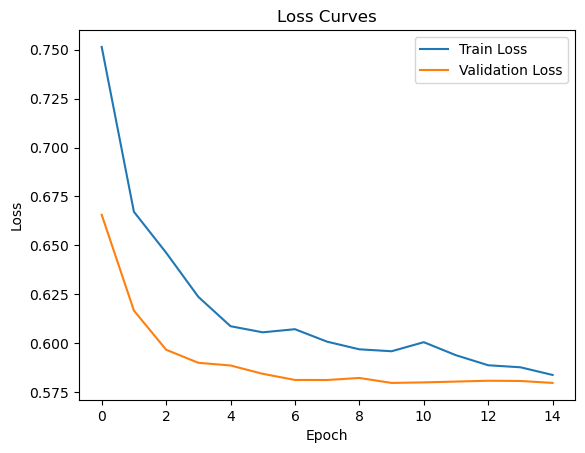


Run 3/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/30 - Train Loss: 0.7170 - Val Loss: 0.6357 - Val Acc: 0.6564 - Precision: 0.6137 - Recall: 0.3813 - F1: 0.4704
Epoch 02/30 - Train Loss: 0.6626 - Val Loss: 0.6095 - Val Acc: 0.6830 - Precision: 0.6893 - Recall: 0.3787 - F1: 0.4888
Epoch 03/30 - Train Loss: 0.6390 - Val Loss: 0.5957 - Val Acc: 0.6937 - Precision: 0.6982 - Recall: 0.4133 - F1: 0.5193
Epoch 04/30 - Train Loss: 0.6312 - Val Loss: 0.5914 - Val Acc: 0.6980 - Precision: 0.7130 - Recall: 0.4107 - F1: 0.5212
Epoch 05/30 - Train Loss: 0.6143 - Val Loss: 0.5881 - Val Acc: 0.6969 - Precision: 0.7078 - Recall: 0.4133 - F1: 0.5219
Epoch 06/30 - Train Loss: 0.6179 - Val Loss: 0.5876 - Val Acc: 0.7012 - Precision: 0.7149 - Recall: 0.4213 - F1: 0.5302
Epoch 07/30 - Train Loss: 0.6086 - Val Loss: 0.5851 - Val Acc: 0.7033 - Precision: 0.7235 -

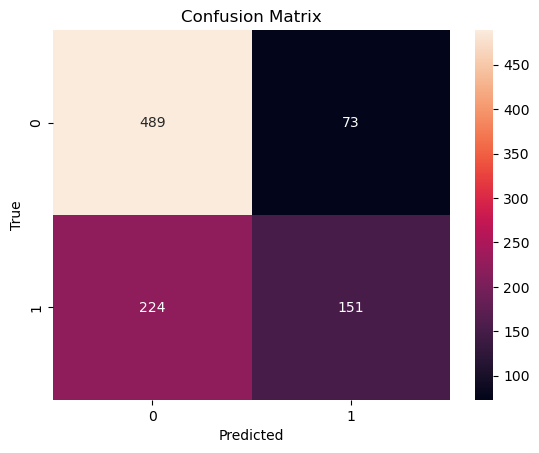

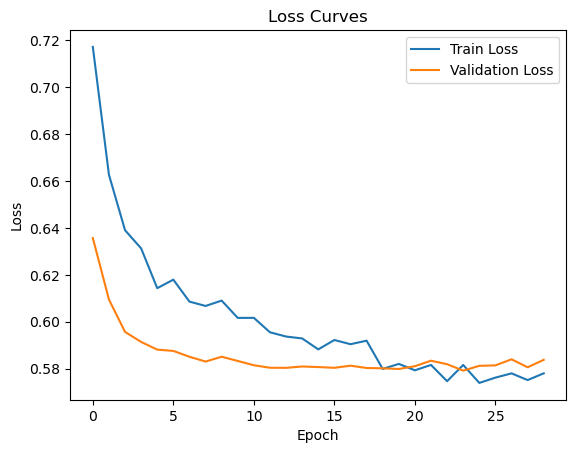

Performance per Run:
   Run  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    1  0.709712   0.698842  0.482667  0.570978  0.737642
1    2  0.699039   0.703057  0.429333  0.533113  0.718814
2    3  0.683031   0.674107  0.402667  0.504174  0.720773
Average Performance Over Runs:
Accuracy     0.697
Precision    0.692
Recall       0.438
F1-Score     0.536
ROC-AUC      0.726
dtype: float64


,Run,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,1,0.709712,0.698842,0.482667,0.570978,0.737642
1,2,0.699039,0.703057,0.429333,0.533113,0.718814
2,3,0.683031,0.674107,0.402667,0.504174,0.720773


In [187]:
evaluate_multiple_runs(
    df=encoded_df,
    target_column='SMM',
    input_dim=input_dim,
    model_class=ResNetTabular,
    epochs=30,
    lr=0.0001,
    patience=5,
    n_runs=3
)


Run 1/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.7579 - Val Loss: 0.7034 - Val Acc: 0.5027 - Precision: 0.4290 - Recall: 0.7333 - F1: 0.5413
Epoch 02/20 - Train Loss: 0.7496 - Val Loss: 0.6861 - Val Acc: 0.5422 - Precision: 0.4520 - Recall: 0.6773 - F1: 0.5422


Epoch 03/20 - Train Loss: 0.7236 - Val Loss: 0.6732 - Val Acc: 0.5774 - Precision: 0.4783 - Recall: 0.6160 - F1: 0.5385
Epoch 04/20 - Train Loss: 0.7170 - Val Loss: 0.6606 - Val Acc: 0.6105 - Precision: 0.5125 - Recall: 0.5467 - F1: 0.5290
Epoch 05/20 - Train Loss: 0.7087 - Val Loss: 0.6529 - Val Acc: 0.6307 - Precision: 0.5393 - Recall: 0.5307 - F1: 0.5349
Epoch 06/20 - Train Loss: 0.6965 - Val Loss: 0.6429 - Val Acc: 0.6585 - Precision: 0.5879 - Recall: 0.4907 - F1: 0.5349
Epoch 07/20 - Train Loss: 0.6887 - Val Loss: 0.6347 - Val Acc: 0.6628 - Precision: 0.5993 - Recall: 0.4747 - F1: 0.5298
Epoch 08/20 - Train Loss: 0.6736 - Val Loss: 0.6284 - Val Acc: 0.6852 - Precision: 0.6639 - Recall: 0.4320 - F1: 0.5234
Epoch 09/20 - Train Loss: 0.6706 - Val Loss: 0.6232 - Val Acc: 0.6894 - Precision: 0.6567 - Recall: 0.4693 - F1: 0.5474
Epoch 10/20 - Train Loss: 0.6737 - Val Loss: 0.6202 - Val Acc: 0.6894 - Precision: 0.6858 - Recall: 0.4133 - F1: 0.5158
Epoch 11/20 - Train Loss: 0.6634 - Val L

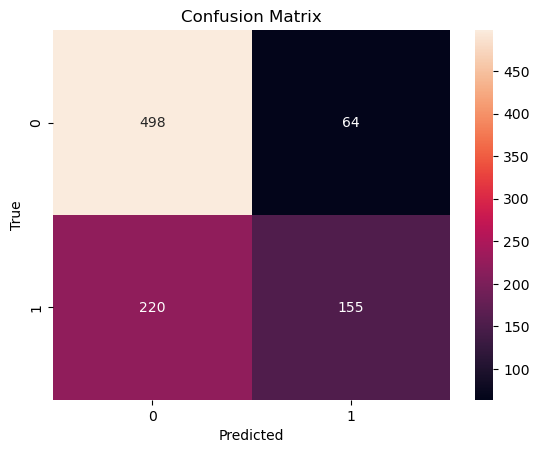

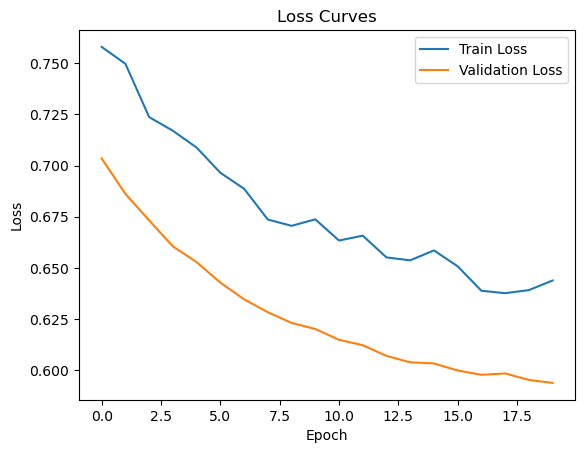


Run 2/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.7464 - Val Loss: 0.7038 - Val Acc: 0.5806 - Precision: 0.4763 - Recall: 0.4827 - F1: 0.4795
Epoch 02/20 - Train Loss: 0.7517 - Val Loss: 0.6918 - Val Acc: 0.5955 - Precision: 0.4945 - Recall: 0.4773 - F1: 0.4858
Epoch 03/20 - Train Loss: 0.7313 - Val Loss: 0.6794 - Val Acc: 0.6201 - Precision: 0.5304 - Recall: 0.4427 - F1: 0.4826
Epoch 04/20 - Train Loss: 0.7241 - Val Loss: 0.6775 - Val Acc: 0.6361 - Precision: 0.5559 - Recall: 0.4507 - F1: 0.4978
Epoch 05/20 - Train Loss: 0.7111 - Val Loss: 0.6647 - Val Acc: 0.6446 - Precision: 0.5827 - Recall: 0.3947 - F1: 0.4706
Epoch 06/20 - Train Loss: 0.7122 - Val Loss: 0.6577 - Val Acc: 0.6521 - Precision: 0.6043 - Recall: 0.3787 - F1: 0.4656
Epoch 07/20 - Train Loss: 0.6928 - Val Loss: 0.6532 - Val Acc: 0.6585 - Precision: 0.6122 -

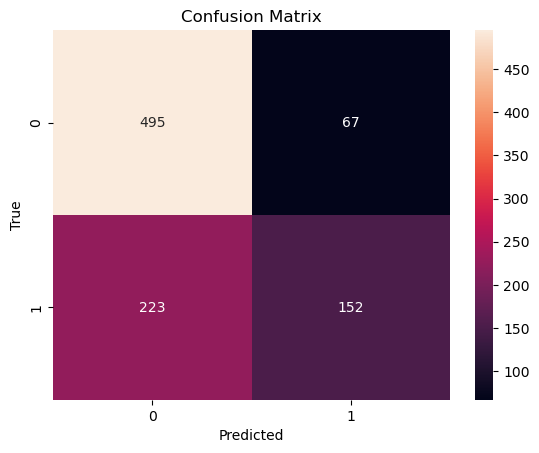

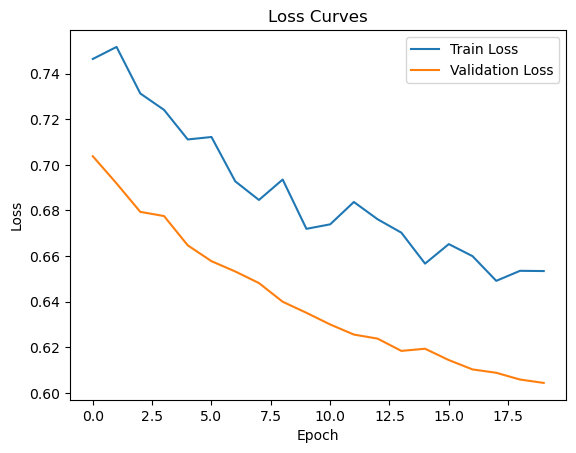


Run 3/3
Class Distribution After 60:40 Split
Train:
SMM
0    0.600053
1    0.399947
Name: Proportion, dtype: float64
Test:
SMM
0    0.599787
1    0.400213
Name: Proportion, dtype: float64
Epoch 01/20 - Train Loss: 0.8006 - Val Loss: 0.7561 - Val Acc: 0.4290 - Precision: 0.4015 - Recall: 0.8693 - F1: 0.5493
Epoch 02/20 - Train Loss: 0.7716 - Val Loss: 0.7384 - Val Acc: 0.4493 - Precision: 0.4071 - Recall: 0.8240 - F1: 0.5450
Epoch 03/20 - Train Loss: 0.7592 - Val Loss: 0.7128 - Val Acc: 0.4909 - Precision: 0.4218 - Recall: 0.7333 - F1: 0.5355
Epoch 04/20 - Train Loss: 0.7363 - Val Loss: 0.7031 - Val Acc: 0.5037 - Precision: 0.4277 - Recall: 0.7093 - F1: 0.5336
Epoch 05/20 - Train Loss: 0.7220 - Val Loss: 0.6868 - Val Acc: 0.5635 - Precision: 0.4657 - Recall: 0.6160 - F1: 0.5304
Epoch 06/20 - Train Loss: 0.7182 - Val Loss: 0.6750 - Val Acc: 0.5987 - Precision: 0.4988 - Recall: 0.5600 - F1: 0.5276
Epoch 07/20 - Train Loss: 0.7018 - Val Loss: 0.6681 - Val Acc: 0.6179 - Precision: 0.5220 -

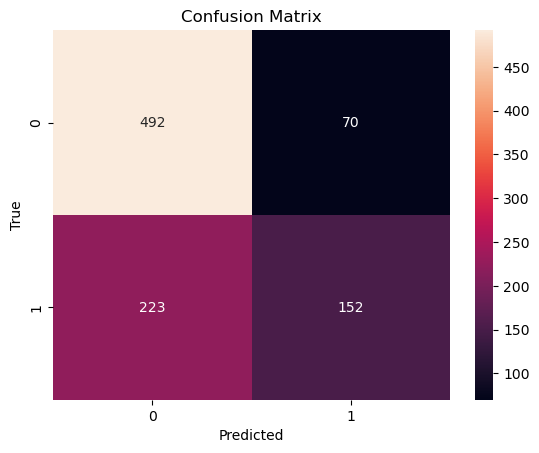

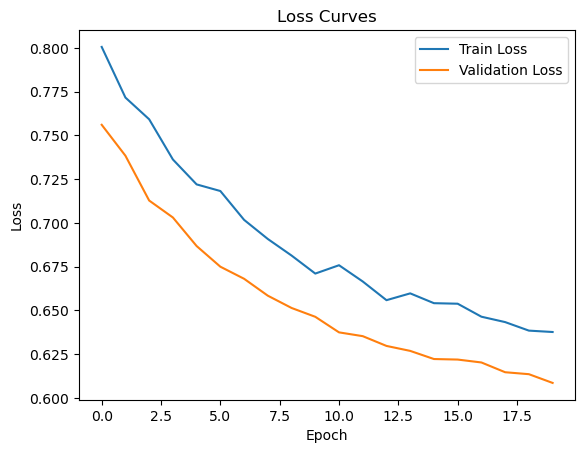

Performance per Run:
   Run  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    1  0.696905   0.707763  0.413333  0.521886  0.708076
1    2  0.690502   0.694064  0.405333  0.511785  0.697044
2    3  0.687300   0.684685  0.405333  0.509213  0.698558
Average Performance Over Runs:
Accuracy     0.692
Precision    0.696
Recall       0.408
F1-Score     0.514
ROC-AUC      0.701
dtype: float64


,Run,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,1,0.696905,0.707763,0.413333,0.521886,0.708076
1,2,0.690502,0.694064,0.405333,0.511785,0.697044
2,3,0.687300,0.684685,0.405333,0.509213,0.698558


In [192]:
evaluate_multiple_runs(
    df=encoded_df,
    target_column='SMM',
    input_dim=input_dim,
    model_class=ResNetTabular,
    epochs=20,
    lr=0.00001,
    patience=10,
    n_runs=3
)